In [1]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))


2023-12-04 09:19:32.733127: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 09:19:34.142773: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 09:19:36.010328: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/home/sidney/anaconda3/envs/tf/lib/
2023-12-04 09:19:36.010497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-12-04 09:19:38.400156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-04 09:19:38.995340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-04 09:19:38.995985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
#!pip install pandas
import pandas as pd
import numpy as np
#!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, f1_score
import scipy.io
from scipy import sparse
import scipy.io as spio
import usoGeral as uGLib
import burstLib

In [3]:
def clusteriza( tSNE, iBtSNE, init=None, nclusters=None, RS=42, outCC=False ):
  if (init is None):
    #kmeans_kwargs = {'init':'random', 'n_init':'auto', 'max_iter':1000, \
     #               'random_state': RS }
    kmeans_kwargs = {'init':'random', 'n_init':10, 'max_iter':2000, \
                    'random_state': RS }
    nclustersEf = nclusters
  else:
    kmeans_kwargs = {'init':init, 'n_init':1, 'max_iter':2000 }
    nclustersEf = np.shape(init)[0]
  if nclustersEf is None:
    sse = []
    for k in range(1,11):
      kmeans = KMeans( n_clusters=k, **kmeans_kwargs )
      kmeans.fit( tSNE )
      sse.append( kmeans.inertia_)
    kl = KneeLocator( range(1,11), sse, curve='convex', direction='decreasing')
    nclustersEf = kl.elbow
  kmeans = KMeans( n_clusters=nclustersEf, **kmeans_kwargs )
  kmeans.fit( tSNE )
  LABELs = kmeans.labels_
  grupo = []
  for lab in np.unique(LABELs):
    grupo.append( iBtSNE[LABELs==lab] )
  if outCC is False:
    return grupo
  else:
    centroides = kmeans.cluster_centers_
    return grupo, centroides,LABELs

In [8]:
data=spio.loadmat('Dados_9_8x6.mat')
tempo = data["t"].copy()
Isat = data["Dp"].copy()
rs = data['rs'].copy()
hs = data['hs'].copy()

In [9]:
Inorm1 = uGLib.X2dX(Isat)
Inorm2 = uGLib.X2dXr(Isat)

In [10]:
tau=20
th=3.0

dIs = uGLib.X2dX(Isat)
data = []
iBEf = []
iSEf = []
for sonda in range(48):
    IsOk = dIs[:,sonda]
    iBok = burstLib.achaBursts( IsOk, th=th )
    iBtSNE = iBok[ iBok>tau ]
    iBtSNE = iBtSNE[ iBtSNE<(len(IsOk)-tau) ]
    for ib in iBtSNE:
      nd = IsOk[ (ib-tau):(ib+tau) ]# / IsOk[ib]
      data.append( nd )
      iBEf.append( ib )
      iSEf.append(  sonda )
data = np.asarray(data)
iBEf = np.asarray(iBEf)
iSEf = np.asarray(iSEf)

In [8]:
#!pip install umap-learn
from umap import UMAP

In [9]:
#data.shape

<img src='UMAP1.png'>
%%html
<a href="/umap-learn.readthedocs.io/en/latest/parametric_umap.html">Showing Text</a>


In [10]:
from umap.parametric_umap import ParametricUMAP

In [11]:
embedder = ParametricUMAP(n_epochs =100, verbose=True)

/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/umap/parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


In [12]:
embedding_data = embedder.fit_transform(data)

ParametricUMAP(optimizer=<keras.optimizers.optimizer_v2.adam.Adam object at 0x7fa891ae9910>)
Thu Nov 30 09:49:57 2023 Construct fuzzy simplicial set
Thu Nov 30 09:49:58 2023 Finding Nearest Neighbors
Thu Nov 30 09:49:58 2023 Building RP forest with 28 trees
Thu Nov 30 09:50:13 2023 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	Stopping threshold met -- exiting after 3 iterations
Thu Nov 30 09:50:44 2023 Finished Nearest Neighbor Search
Thu Nov 30 09:50:49 2023 Construct embedding


2023-11-30 09:52:35.113548: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 09:52:35.170585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-30 09:52:35.178435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-30 09:52:35.179010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Epoch 1/10
13657/13657 [==============================] - 70s 5ms/step - loss: 0.1840
Epoch 2/10
13657/13657 [==============================] - 65s 5ms/step - loss: 0.1829
Epoch 3/10
13657/13657 [==============================] - 114s 8ms/step - loss: 0.1828
Epoch 4/10
13657/13657 [==============================] - 104s 8ms/step - loss: 0.1827
Epoch 5/10
13657/13657 [==============================] - 98s 7ms/step - loss: 0.1827
Epoch 6/10
13657/13657 [==============================] - 108s 8ms/step - loss: 0.1826
Epoch 7/10
13657/13657 [==============================] - 142s 10ms/step - loss: 0.1826
Epoch 8/10
13657/13657 [==============================] - 94s 7ms/step - loss: 0.1826
Epoch 9/10
13657/13657 [==============================] - 107s 8ms/step - loss: 0.1826
Epoch 10/10
6617/6617 [==============================] - 18s 3ms/step
Thu Nov 30 10:10:16 2023 Finished embedding


Text(0.5, 0, 'Epoch')

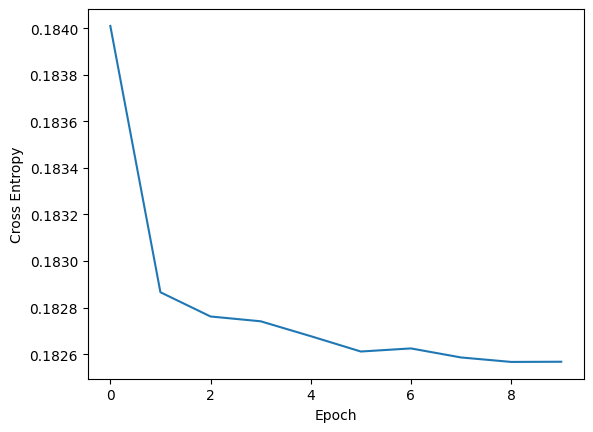

In [15]:
embedder._history.keys()
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

In [16]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances

In [17]:
G, cC,label= clusteriza( embedding_data, np.arange(0,len(iBEf)), nclusters=12, outCC=True )
sBs = []
iBs = []
for g in G:
  sBs.append( iSEf[g] )
  iBs.append( iBEf[g] )

In [18]:
from matplotlib import colors as mcolors
import colorsys


def man_cmap(cmap, value=1.):
    colors = cmap(np.arange(cmap.N))
    hls = np.array([colorsys.rgb_to_hls(*c) for c in colors[:,:3]])
    hls[:,1] *= value
    rgb = np.clip(np.array([colorsys.hls_to_rgb(*c) for c in hls]), 0,1)
    return mcolors.LinearSegmentedColormap.from_list("", rgb)

cmap = plt.cm.get_cmap("jet")

/tmp/ipykernel_3639/375502951.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("jet")


In [19]:
label = label.reshape(-1,1)
X = np.hstack([embedding_data,label])
data1= np.zeros([cC.shape[0],iBEf.shape[0],2])
for k in range(cC.shape[0]):
    for i in range(iBEf.shape[0]):
            if(X[i,2] == k):
                for j in range(2):
                      data1[k,i,j] = X[i,j]

In [20]:
a = label.reshape(-1)
unique, counts = np.unique(a, return_counts=True)

result = np.column_stack((unique, counts))
print("Numero do grupo,"," ", "Quantidade")
print(result)

Numero do grupo,   Quantidade
[[    0 17897]
 [    1 17026]
 [    2 16091]
 [    3 19876]
 [    4 17144]
 [    5 17603]
 [    6 15857]
 [    7 16495]
 [    8 19353]
 [    9 16888]
 [   10 20154]
 [   11 17357]]


/tmp/ipykernel_3639/3477126426.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data1[k][:,0],data1[k][:,1],lw=0.8, s=0.01,alpha =0.8,cmap=cmap,label=k)


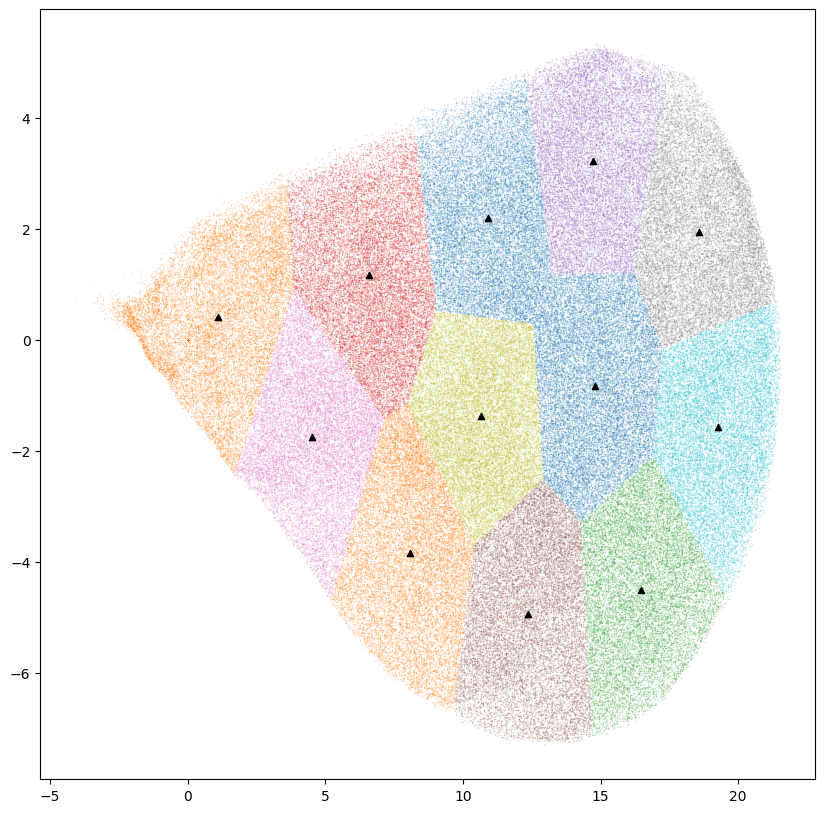

In [21]:
plt.figure(figsize=(10, 10))
for k in range(cC.shape[0]):
    plt.scatter(data1[k][:,0],data1[k][:,1],lw=0.8, s=0.01,alpha =0.8,cmap=cmap,label=k)
plt.scatter(cC[:,0], cC[:,1],marker="^",lw=1, s=20,c='black')

In [22]:
data=spio.loadmat('Dados_7_4V_8x6.mat')
tempo = data["t"].copy()
Isat = data["Dp"].copy()
rs = data['rs'].copy()
hs = data['hs'].copy()

In [23]:
Inorm1 = uGLib.X2dX(Isat)
Inorm2 = uGLib.X2dXr(Isat)

In [24]:
tau=20
th=3.0

dIs = uGLib.X2dX(Isat)
data = []
iBEf = []
iSEf = []
for sonda in range(48):
    IsOk = dIs[:,sonda]
    iBok = burstLib.achaBursts( IsOk, th=th )
    iBtSNE = iBok[ iBok>tau ]
    iBtSNE = iBtSNE[ iBtSNE<(len(IsOk)-tau) ]
    for ib in iBtSNE:
      nd = IsOk[ (ib-tau):(ib+tau) ]# / IsOk[ib]
      data.append( nd )
      iBEf.append( ib )
      iSEf.append(  sonda )
data = np.asarray(data)
iBEf = np.asarray(iBEf)
iSEf = np.asarray(iSEf)

In [25]:
data.shape

(149180, 40)

In [26]:
embedding = embedder.transform(data)

150/150 [==============================] - 0s 1ms/step


In [27]:
G, cC,label= clusteriza( embedding, np.arange(0,len(iBEf)), nclusters=12, outCC=True )
sBs = []
iBs = []
for g in G:
  sBs.append( iSEf[g] )
  iBs.append( iBEf[g] )

In [28]:
label = label.reshape(-1,1)
X = np.hstack([embedding,label])
data1= np.zeros([cC.shape[0],iBEf.shape[0],2])
for k in range(cC.shape[0]):
    for i in range(iBEf.shape[0]):
            if(X[i,2] == k):
                for j in range(2):
                      data1[k,i,j] = X[i,j]

/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: divide by zero encountered in divide
  ret = um.true_divide(
/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


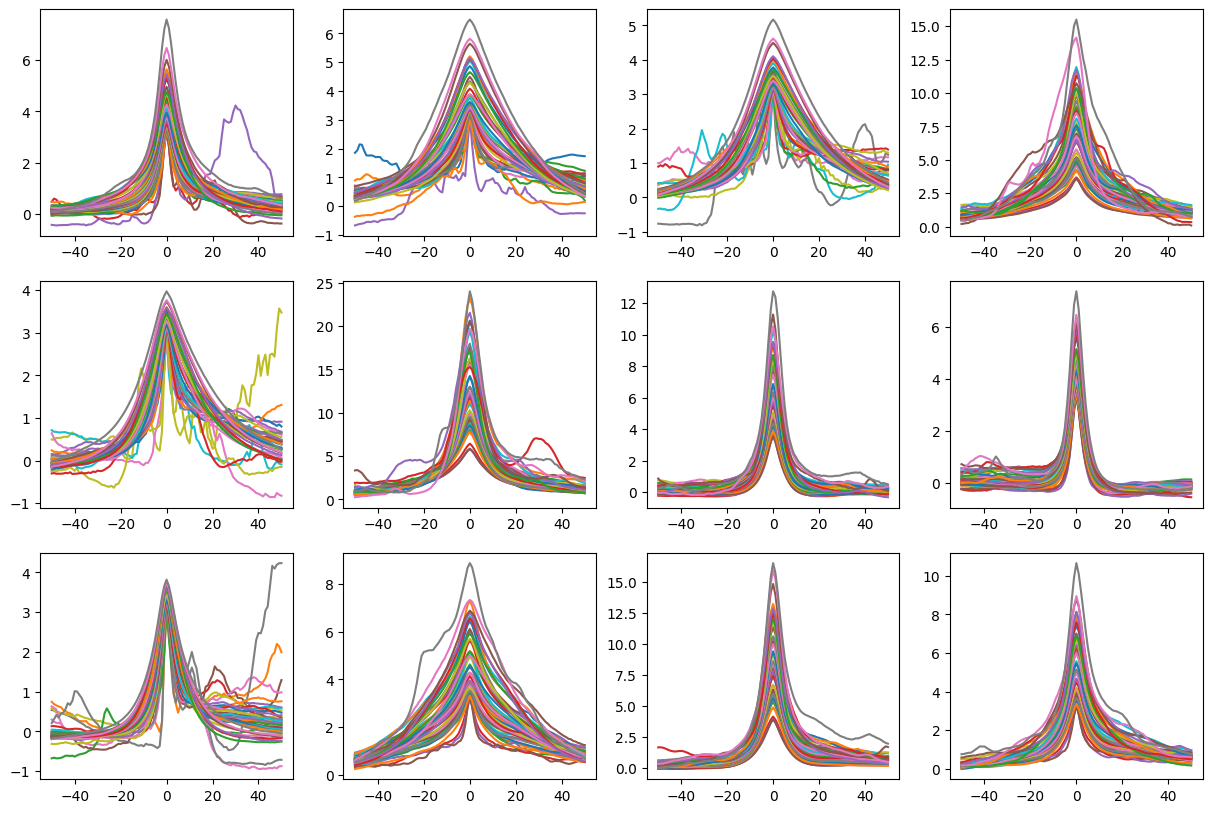

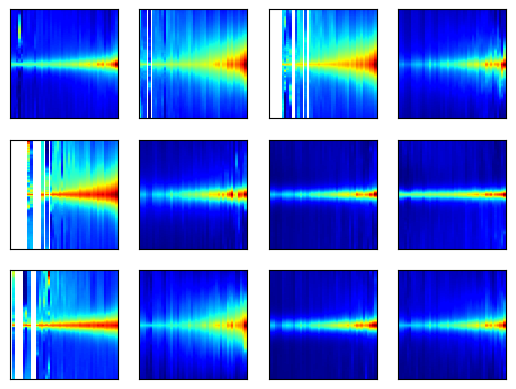

In [29]:
f1=plt.figure(figsize=(15, 10))
f2=plt.figure()
for qG in range(len(G)):
  nLin = int( np.floor(np.sqrt(len(G)) ) )
  nCol = int( np.ceil(len(G)/nLin) )
  plt.figure(f1)
  plt.subplot( nLin, nCol, qG+1 )
  X = np.zeros( (48,101) )
  for qS in range(48):
    XMC, Lag, XC = burstLib.mediaCondicional(Inorm2[:,qS],iBs[qG][sBs[qG]==qS])
    plt.figure(f1)
    plt.plot( Lag, XMC, '-')

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    X[qS,:] = XMC.reshape( (-1) )
  plt.figure(f2)
  plt.subplot( nLin, nCol, qG+1 )
  plt.pcolor(X.T, cmap=plt.cm.jet )
  plt.xticks(ticks=[])
  plt.yticks(ticks=[])

In [30]:
a = label.reshape(-1)
unique, counts = np.unique(a, return_counts=True)

result_7v = np.column_stack((unique, counts))
print("Numero do grupo,"," ", "Quantidade")
print(result_7v)

Numero do grupo,   Quantidade
[[    0 14073]
 [    1 13489]
 [    2 12615]
 [    3 12204]
 [    4 11658]
 [    5 11335]
 [    6 11499]
 [    7 11669]
 [    8 11152]
 [    9 13448]
 [   10 12591]
 [   11 13447]]


/tmp/ipykernel_3639/3477126426.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data1[k][:,0],data1[k][:,1],lw=0.8, s=0.01,alpha =0.8,cmap=cmap,label=k)


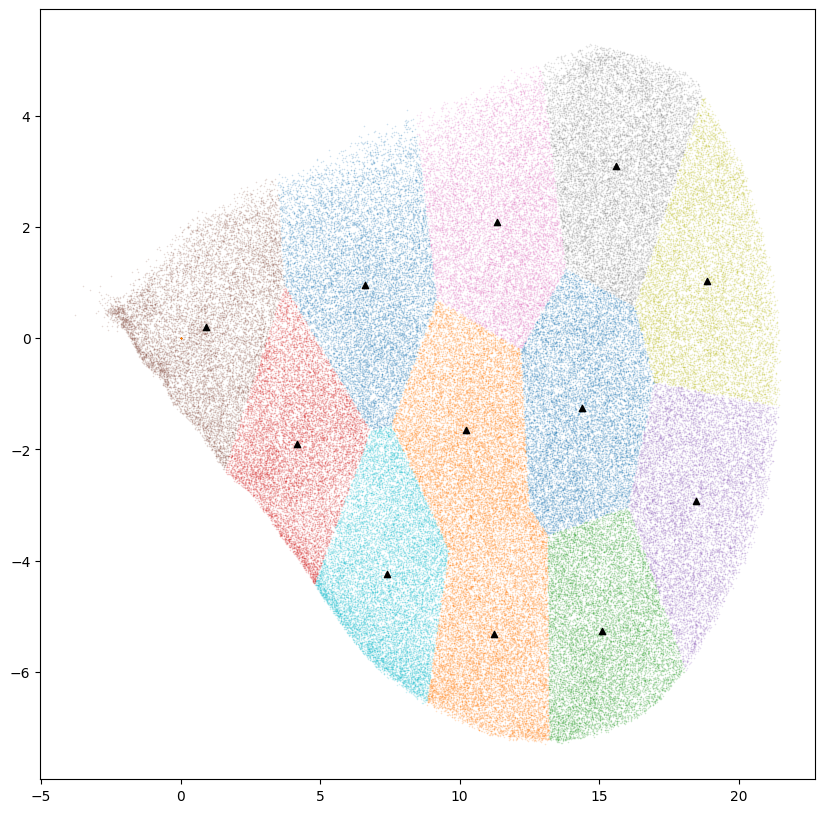

In [31]:
plt.figure(figsize=(10, 10))
for k in range(cC.shape[0]):
    plt.scatter(data1[k][:,0],data1[k][:,1],lw=0.8, s=0.01,alpha =0.8,cmap=cmap,label=k)
plt.scatter(cC[:,0], cC[:,1],marker="^",lw=1, s=20,c='black')

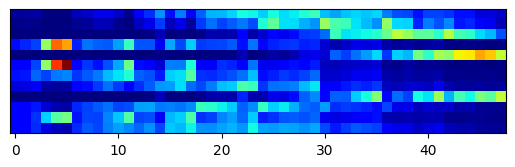

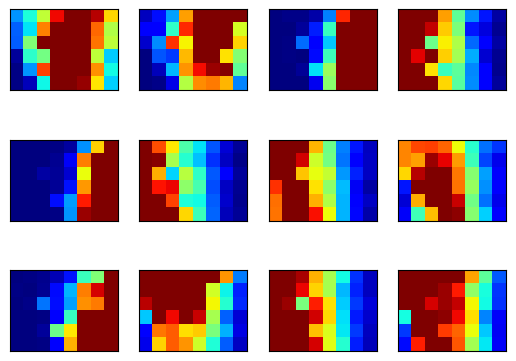

In [32]:
hG = np.zeros( (len(G),48) )
for ig, g in enumerate(G):
  #print( f'{g.shape[0]:5d}:', end=' ' )
  for i in range(48):
    hG[ig,i] = len(g[sBs[ig]==i])
   # print( f'{len(g[sBs[ig]==i]):4d}', end=' ' )
 # print( )
plt.figure()
plt.imshow(hG, cmap=plt.cm.jet)
plt.yticks(ticks=[])
plt.xticks(fontsize=10)
#plt.colorbar()
plt.show()

plt.figure()
for i in range(len(G)):
  nLin = int( np.floor(np.sqrt(len(G)) ) )
  nCol = int( np.ceil(len(G)/nLin) )
  plt.subplot(nLin,nCol,i+1)
  plt.imshow( (hG[i,:]/np.sum(hG,axis=0) ).reshape( (8,6)).T, \
             cmap=plt.cm.jet, clim=[0, 1.5/len(G)] )
  plt.xticks(ticks=[])
  plt.yticks(ticks=[])
  #plt.colorbar()
plt.show()

In [33]:
data=spio.loadmat('Dados_9_8V_8x6.mat')
tempo = data["t"].copy()
Isat = data["Dp"].copy()
rs = data['rs'].copy()
hs = data['hs'].copy()

Inorm1 = uGLib.X2dX(Isat)
Inorm2 = uGLib.X2dXr(Isat)

tau=20
th=3.0

dIs = uGLib.X2dX(Isat)
data = []
iBEf = []
iSEf = []
for sonda in range(48):
    IsOk = dIs[:,sonda]
    iBok = burstLib.achaBursts( IsOk, th=th )
    iBtSNE = iBok[ iBok>tau ]
    iBtSNE = iBtSNE[ iBtSNE<(len(IsOk)-tau) ]
    for ib in iBtSNE:
      nd = IsOk[ (ib-tau):(ib+tau) ]# / IsOk[ib]
      data.append( nd )
      iBEf.append( ib )
      iSEf.append(  sonda )
data = np.asarray(data)
iBEf = np.asarray(iBEf)
iSEf = np.asarray(iSEf)


print(data.shape)

embedding = embedder.transform(data)


G, cC,label= clusteriza( embedding, np.arange(0,len(iBEf)), nclusters=12, outCC=True )
sBs = []
iBs = []
for g in G:
  sBs.append( iSEf[g] )
  iBs.append( iBEf[g] )


label = label.reshape(-1,1)
X = np.hstack([embedding,label])
data1= np.zeros([cC.shape[0],iBEf.shape[0],2])
for k in range(cC.shape[0]):
    for i in range(iBEf.shape[0]):
            if(X[i,2] == k):
                for j in range(2):
                      data1[k,i,j] = X[i,j]

a = label.reshape(-1)
unique, counts = np.unique(a, return_counts=True)

result_8v = np.column_stack((unique, counts))
print("Numero do grupo,"," ", "Quantidade")
print(result_8v)

(211741, 40)
212/212 [==============================] - 0s 1ms/step
Numero do grupo,   Quantidade
[[    0 17897]
 [    1 17026]
 [    2 16091]
 [    3 19876]
 [    4 17144]
 [    5 17603]
 [    6 15857]
 [    7 16495]
 [    8 19353]
 [    9 16888]
 [   10 20154]
 [   11 17357]]


/tmp/ipykernel_3639/3477126426.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data1[k][:,0],data1[k][:,1],lw=0.8, s=0.01,alpha =0.8,cmap=cmap,label=k)


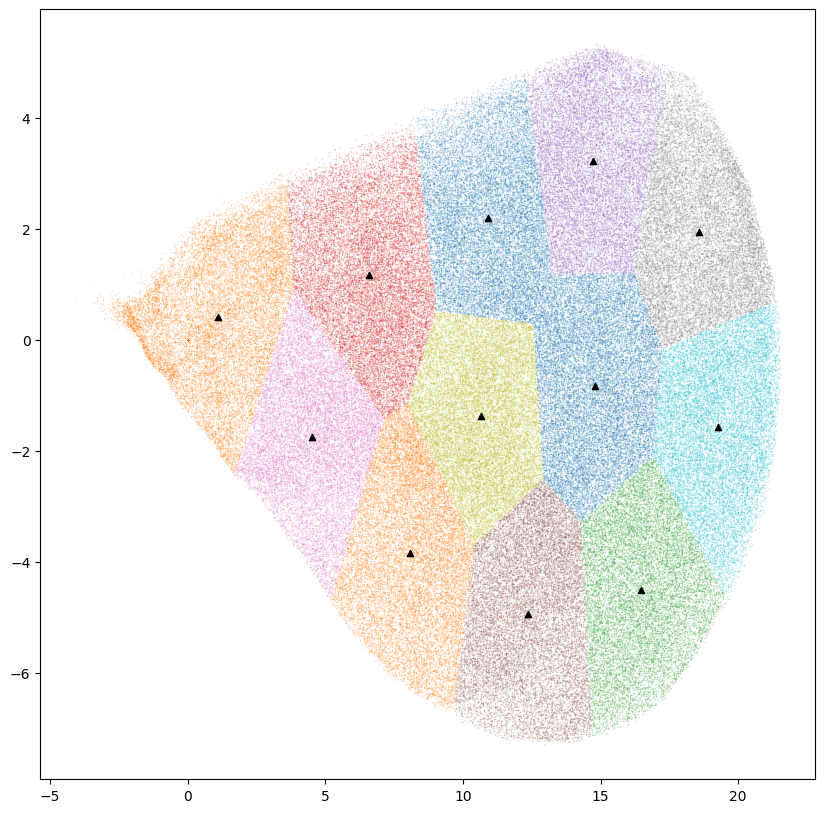

In [34]:
plt.figure(figsize=(10, 10))
for k in range(cC.shape[0]):
    plt.scatter(data1[k][:,0],data1[k][:,1],lw=0.8, s=0.01,alpha =0.8,cmap=cmap,label=k)
plt.scatter(cC[:,0], cC[:,1],marker="^",lw=1, s=20,c='black')

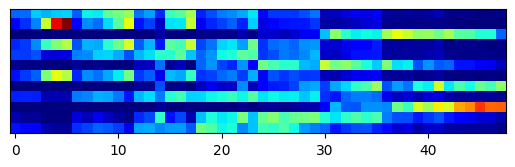

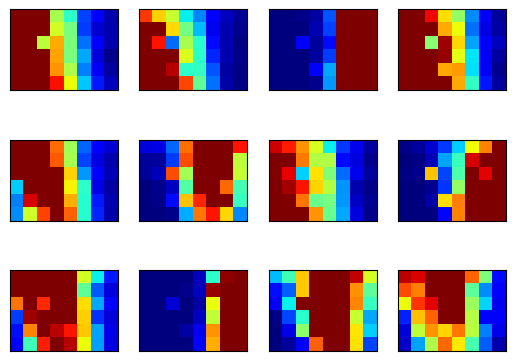

In [35]:
hG = np.zeros( (len(G),48) )
for ig, g in enumerate(G):
  #print( f'{g.shape[0]:5d}:', end=' ' )
  for i in range(48):
    hG[ig,i] = len(g[sBs[ig]==i])
   # print( f'{len(g[sBs[ig]==i]):4d}', end=' ' )
 # print( )
plt.figure()
plt.imshow(hG, cmap=plt.cm.jet)
plt.yticks(ticks=[])
plt.xticks(fontsize=10)
#plt.colorbar()
plt.show()

plt.figure()
for i in range(len(G)):
  nLin = int( np.floor(np.sqrt(len(G)) ) )
  nCol = int( np.ceil(len(G)/nLin) )
  plt.subplot(nLin,nCol,i+1)
  plt.imshow( (hG[i,:]/np.sum(hG,axis=0) ).reshape( (8,6)).T, \
             cmap=plt.cm.jet, clim=[0, 1.5/len(G)] )
  plt.xticks(ticks=[])
  plt.yticks(ticks=[])
  #plt.colorbar()
plt.show()

/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: divide by zero encountered in divide
  ret = um.true_divide(
/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


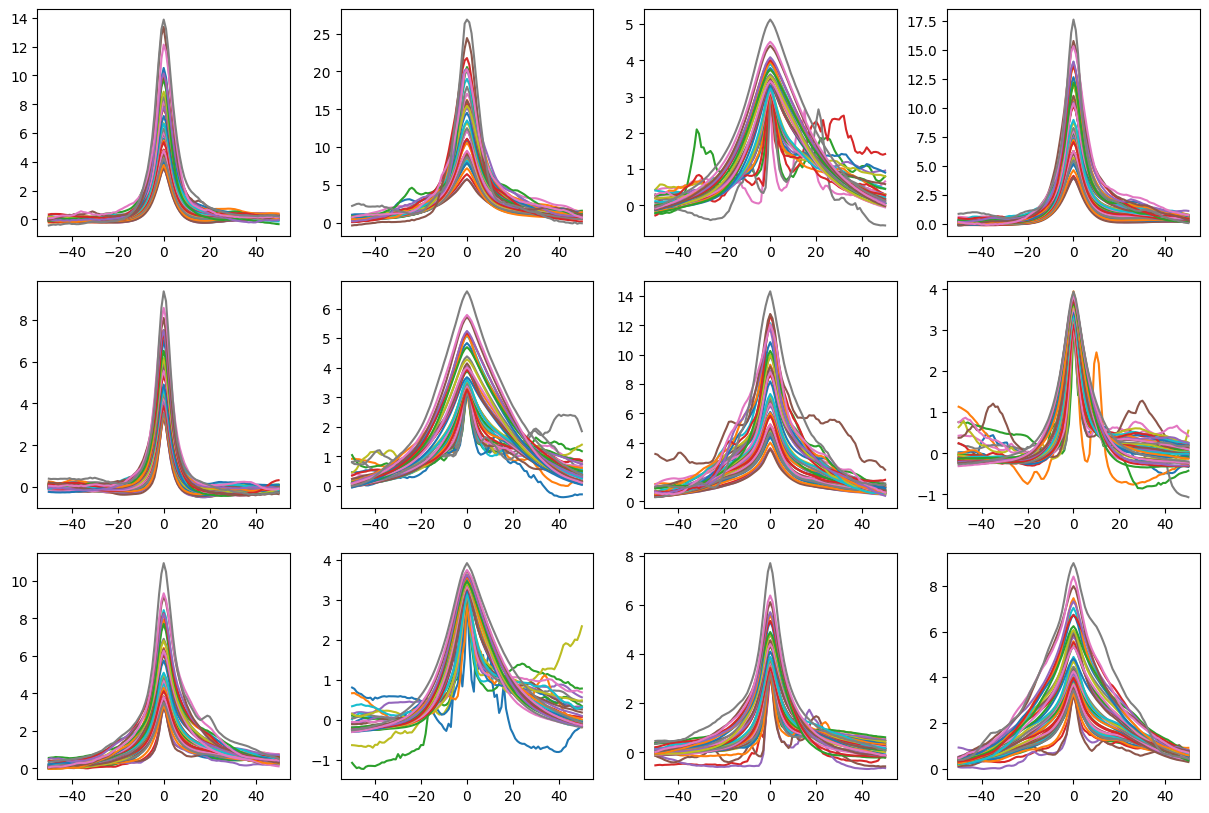

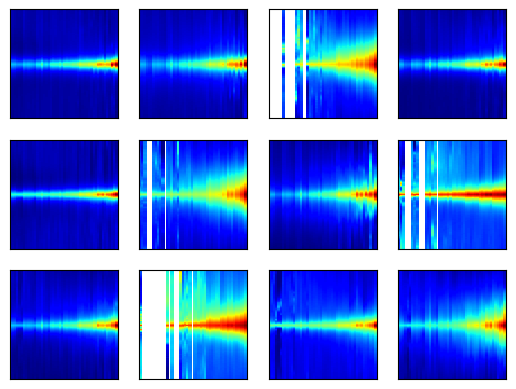

In [36]:
f1=plt.figure(figsize=(15, 10))
f2=plt.figure()
for qG in range(len(G)):
  nLin = int( np.floor(np.sqrt(len(G)) ) )
  nCol = int( np.ceil(len(G)/nLin) )
  plt.figure(f1)
  plt.subplot( nLin, nCol, qG+1 )
  X = np.zeros( (48,101) )
  for qS in range(48):
    XMC, Lag, XC = burstLib.mediaCondicional(Inorm2[:,qS],iBs[qG][sBs[qG]==qS])
    plt.figure(f1)
    plt.plot( Lag, XMC, '-')

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    X[qS,:] = XMC.reshape( (-1) )
  plt.figure(f2)
  plt.subplot( nLin, nCol, qG+1 )
  plt.pcolor(X.T, cmap=plt.cm.jet )
  plt.xticks(ticks=[])
  plt.yticks(ticks=[])

In [37]:
data=spio.loadmat('Dados_10_10V_8x6.mat')
tempo = data["t"].copy()
Isat = data["Dp"].copy()
rs = data['rs'].copy()
hs = data['hs'].copy()

Inorm1 = uGLib.X2dX(Isat)
Inorm2 = uGLib.X2dXr(Isat)

tau=20
th=3.0

dIs = uGLib.X2dX(Isat)
data = []
iBEf = []
iSEf = []
for sonda in range(48):
    IsOk = dIs[:,sonda]
    iBok = burstLib.achaBursts( IsOk, th=th )
    iBtSNE = iBok[ iBok>tau ]
    iBtSNE = iBtSNE[ iBtSNE<(len(IsOk)-tau) ]
    for ib in iBtSNE:
      nd = IsOk[ (ib-tau):(ib+tau) ]# / IsOk[ib]
      data.append( nd )
      iBEf.append( ib )
      iSEf.append(  sonda )
data = np.asarray(data)
iBEf = np.asarray(iBEf)
iSEf = np.asarray(iSEf)


print(data.shape)

embedding = embedder.transform(data)


G, cC,label= clusteriza( embedding, np.arange(0,len(iBEf)), nclusters=12, outCC=True )
sBs = []
iBs = []
for g in G:
  sBs.append( iSEf[g] )
  iBs.append( iBEf[g] )


label = label.reshape(-1,1)
X = np.hstack([embedding,label])
data1= np.zeros([cC.shape[0],iBEf.shape[0],2])
for k in range(cC.shape[0]):
    for i in range(iBEf.shape[0]):
            if(X[i,2] == k):
                for j in range(2):
                      data1[k,i,j] = X[i,j]

a = label.reshape(-1)
unique, counts = np.unique(a, return_counts=True)

result_10v = np.column_stack((unique, counts))
print("Numero do grupo,"," ", "Quantidade")
print(result_10v)

(246346, 40)
247/247 [==============================] - 0s 1ms/step
Numero do grupo,   Quantidade
[[    0 22964]
 [    1 19326]
 [    2 21369]
 [    3 20458]
 [    4 20201]
 [    5 23182]
 [    6 15640]
 [    7 18909]
 [    8 17803]
 [    9 22599]
 [   10 21103]
 [   11 22792]]


/tmp/ipykernel_3639/3477126426.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data1[k][:,0],data1[k][:,1],lw=0.8, s=0.01,alpha =0.8,cmap=cmap,label=k)


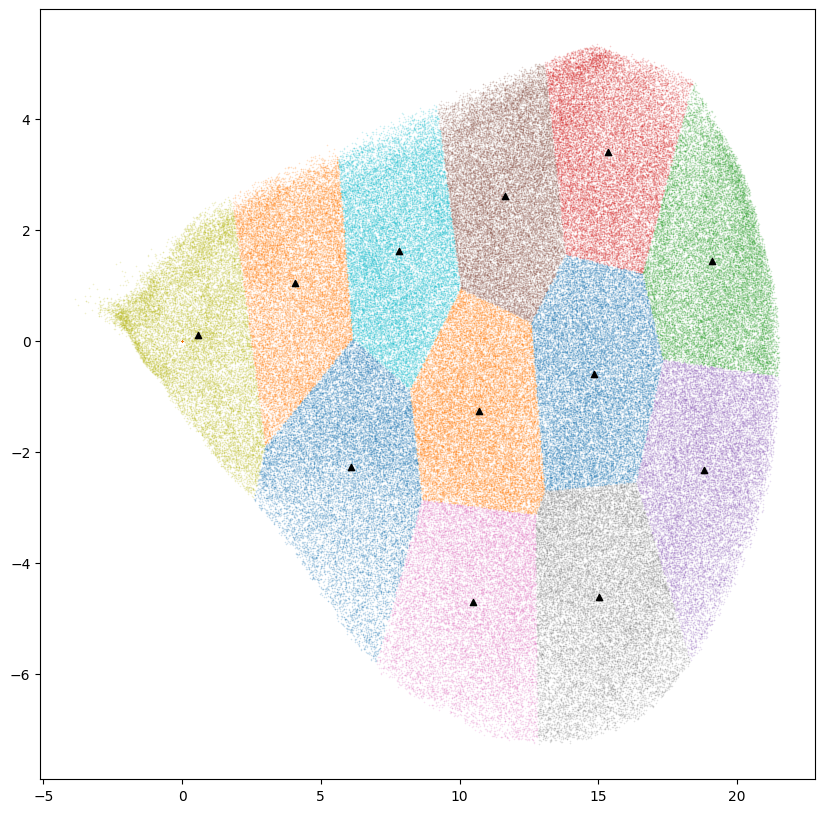

In [38]:
plt.figure(figsize=(10, 10))
for k in range(cC.shape[0]):
    plt.scatter(data1[k][:,0],data1[k][:,1],lw=0.8, s=0.01,alpha =0.8,cmap=cmap,label=k)
plt.scatter(cC[:,0], cC[:,1],marker="^",lw=1, s=20,c='black')

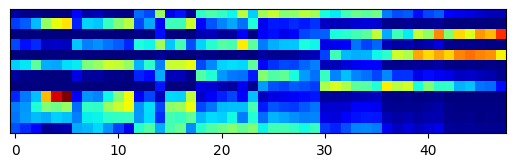

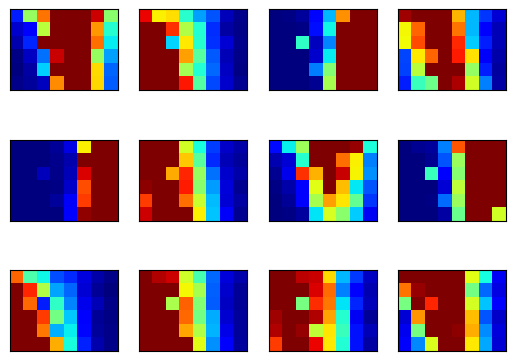

In [39]:
hG = np.zeros( (len(G),48) )
for ig, g in enumerate(G):
  #print( f'{g.shape[0]:5d}:', end=' ' )
  for i in range(48):
    hG[ig,i] = len(g[sBs[ig]==i])
   # print( f'{len(g[sBs[ig]==i]):4d}', end=' ' )
 # print( )
plt.figure()
plt.imshow(hG, cmap=plt.cm.jet)
plt.yticks(ticks=[])
plt.xticks(fontsize=10)
#plt.colorbar()
plt.show()

plt.figure()
for i in range(len(G)):
  nLin = int( np.floor(np.sqrt(len(G)) ) )
  nCol = int( np.ceil(len(G)/nLin) )
  plt.subplot(nLin,nCol,i+1)
  plt.imshow( (hG[i,:]/np.sum(hG,axis=0) ).reshape( (8,6)).T, \
             cmap=plt.cm.jet, clim=[0, 1.5/len(G)] )
  plt.xticks(ticks=[])
  plt.yticks(ticks=[])
  #plt.colorbar()
plt.show()

/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: divide by zero encountered in divide
  ret = um.true_divide(
/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


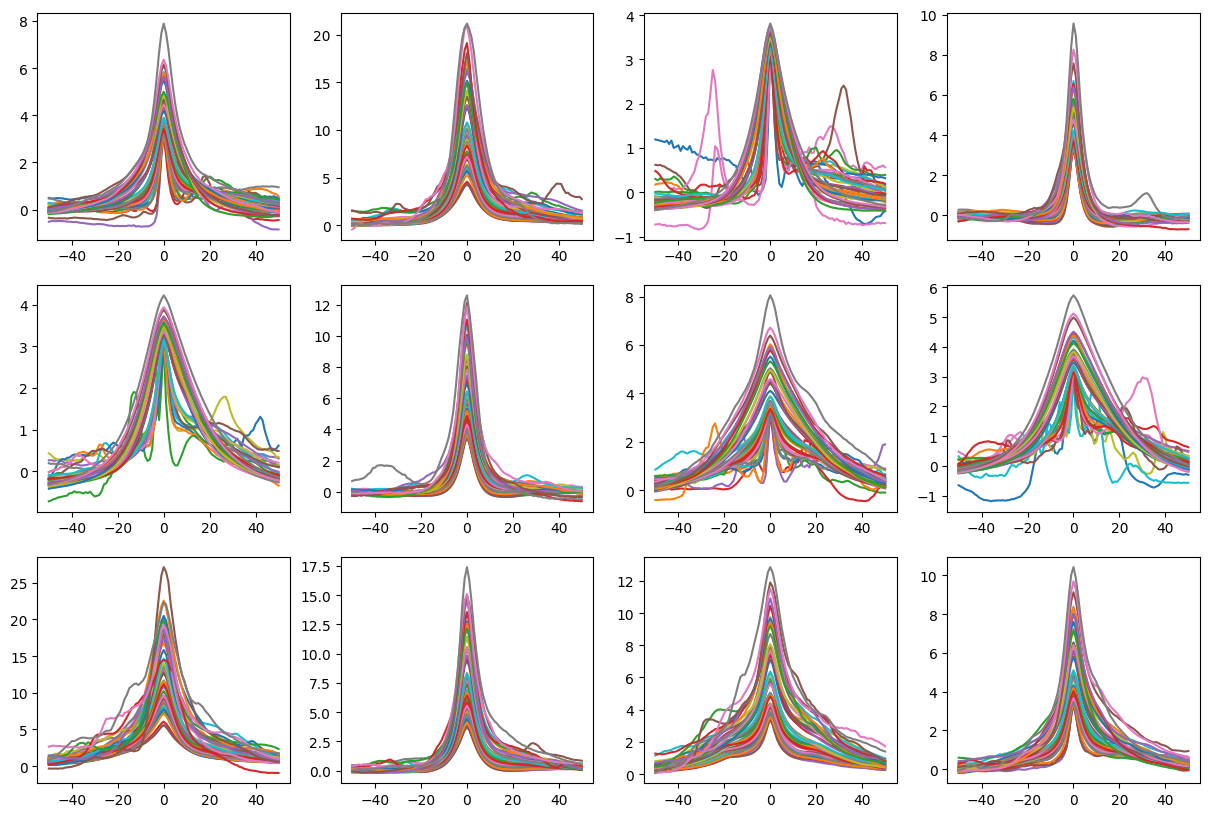

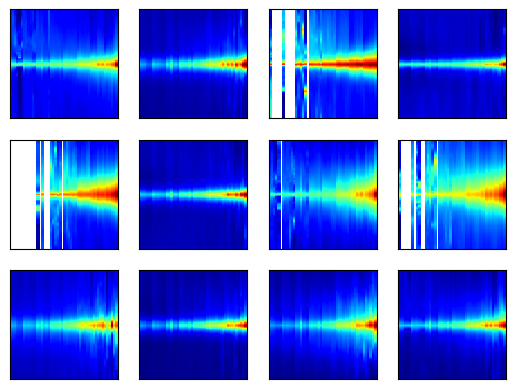

In [40]:
f1=plt.figure(figsize=(15, 10))
f2=plt.figure()
for qG in range(len(G)):
  nLin = int( np.floor(np.sqrt(len(G)) ) )
  nCol = int( np.ceil(len(G)/nLin) )
  plt.figure(f1)
  plt.subplot( nLin, nCol, qG+1 )
  X = np.zeros( (48,101) )
  for qS in range(48):
    XMC, Lag, XC = burstLib.mediaCondicional(Inorm2[:,qS],iBs[qG][sBs[qG]==qS])
    plt.figure(f1)
    plt.plot( Lag, XMC, '-')

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    X[qS,:] = XMC.reshape( (-1) )
  plt.figure(f2)
  plt.subplot( nLin, nCol, qG+1 )
  plt.pcolor(X.T, cmap=plt.cm.jet )
  plt.xticks(ticks=[])
  plt.yticks(ticks=[])

In [41]:
data=spio.loadmat('Dados_13_14V_8x6.mat')
tempo = data["t"].copy()
Isat = data["Dp"].copy()
rs = data['rs'].copy()
hs = data['hs'].copy()

Inorm1 = uGLib.X2dX(Isat)
Inorm2 = uGLib.X2dXr(Isat)

tau=20
th=3.0

dIs = uGLib.X2dX(Isat)
data = []
iBEf = []
iSEf = []
for sonda in range(48):
    IsOk = dIs[:,sonda]
    iBok = burstLib.achaBursts( IsOk, th=th )
    iBtSNE = iBok[ iBok>tau ]
    iBtSNE = iBtSNE[ iBtSNE<(len(IsOk)-tau) ]
    for ib in iBtSNE:
      nd = IsOk[ (ib-tau):(ib+tau) ]# / IsOk[ib]
      data.append( nd )
      iBEf.append( ib )
      iSEf.append(  sonda )
data = np.asarray(data)
iBEf = np.asarray(iBEf)
iSEf = np.asarray(iSEf)


print(data.shape)

embedding = embedder.transform(data)


G, cC,label= clusteriza( embedding, np.arange(0,len(iBEf)), nclusters=12, outCC=True )
sBs = []
iBs = []
for g in G:
  sBs.append( iSEf[g] )
  iBs.append( iBEf[g] )


label = label.reshape(-1,1)
X = np.hstack([embedding,label])
data1= np.zeros([cC.shape[0],iBEf.shape[0],2])
for k in range(cC.shape[0]):
    for i in range(iBEf.shape[0]):
            if(X[i,2] == k):
                for j in range(2):
                      data1[k,i,j] = X[i,j]

a = label.reshape(-1)
unique, counts = np.unique(a, return_counts=True)

result_14v = np.column_stack((unique, counts))
print("Numero do grupo,"," ", "Quantidade")
print(result_14v)

(299983, 40)
300/300 [==============================] - 0s 1ms/step
Numero do grupo,   Quantidade
[[    0 18754]
 [    1 25899]
 [    2 24461]
 [    3 21816]
 [    4 23830]
 [    5 24565]
 [    6 20393]
 [    7 33182]
 [    8 24253]
 [    9 22808]
 [   10 32428]
 [   11 27594]]


/tmp/ipykernel_3639/3477126426.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data1[k][:,0],data1[k][:,1],lw=0.8, s=0.01,alpha =0.8,cmap=cmap,label=k)


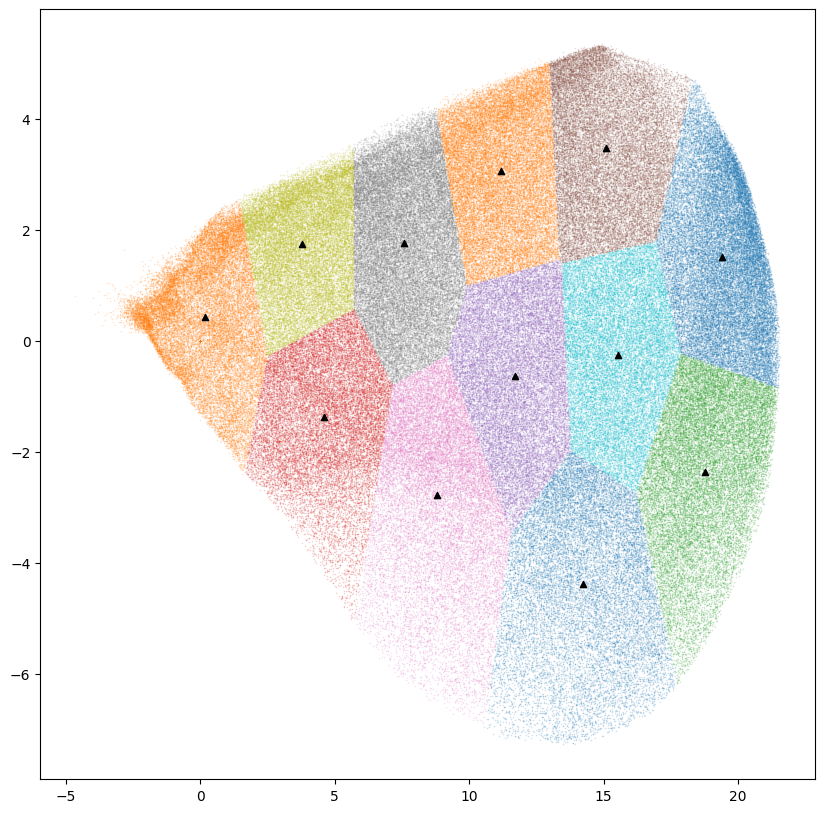

In [42]:
plt.figure(figsize=(10, 10))
for k in range(cC.shape[0]):
    plt.scatter(data1[k][:,0],data1[k][:,1],lw=0.8, s=0.01,alpha =0.8,cmap=cmap,label=k)
plt.scatter(cC[:,0], cC[:,1],marker="^",lw=1, s=20,c='black')

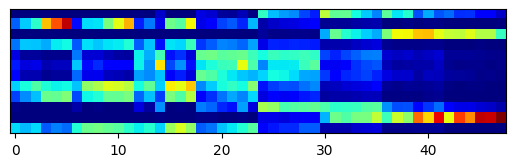

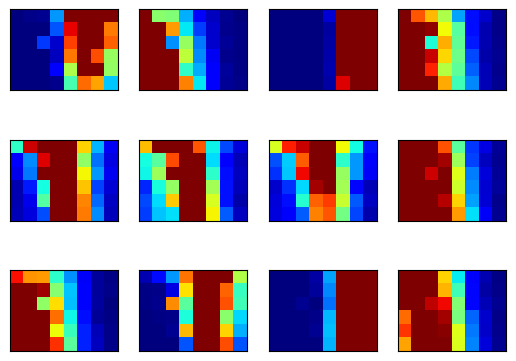

In [43]:
hG = np.zeros( (len(G),48) )
for ig, g in enumerate(G):
  #print( f'{g.shape[0]:5d}:', end=' ' )
  for i in range(48):
    hG[ig,i] = len(g[sBs[ig]==i])
   # print( f'{len(g[sBs[ig]==i]):4d}', end=' ' )
 # print( )
plt.figure()
plt.imshow(hG, cmap=plt.cm.jet)
plt.yticks(ticks=[])
plt.xticks(fontsize=10)
#plt.colorbar()
plt.show()

plt.figure()
for i in range(len(G)):
  nLin = int( np.floor(np.sqrt(len(G)) ) )
  nCol = int( np.ceil(len(G)/nLin) )
  plt.subplot(nLin,nCol,i+1)
  plt.imshow( (hG[i,:]/np.sum(hG,axis=0) ).reshape( (8,6)).T, \
             cmap=plt.cm.jet, clim=[0, 1.5/len(G)] )
  plt.xticks(ticks=[])
  plt.yticks(ticks=[])
  #plt.colorbar()
plt.show()

/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: divide by zero encountered in divide
  ret = um.true_divide(
/home/sidney/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


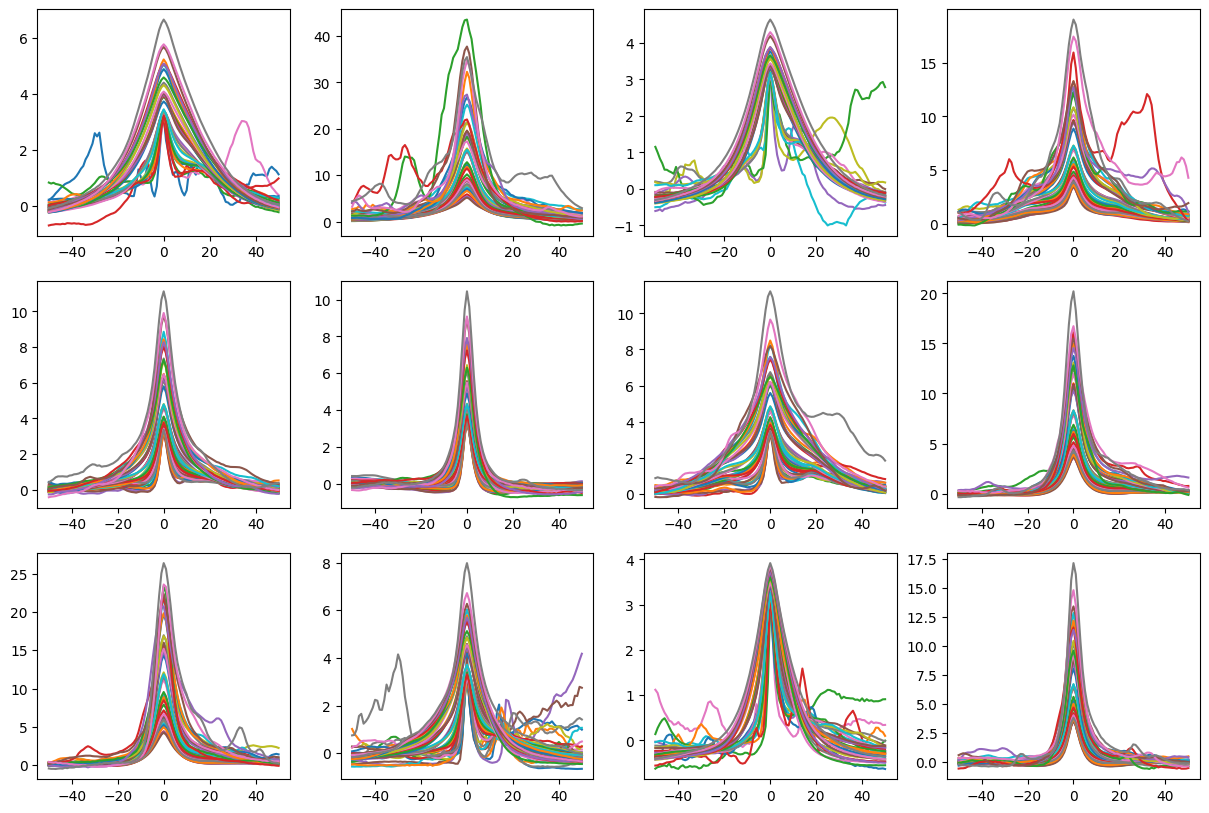

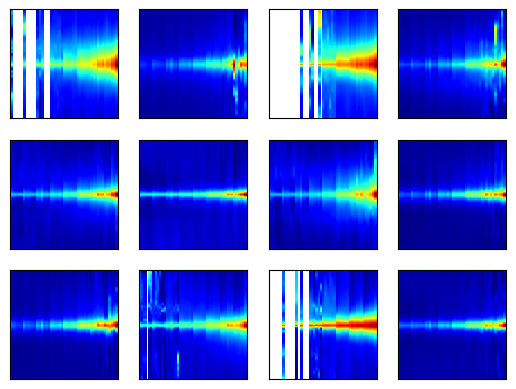

In [44]:
f1=plt.figure(figsize=(15, 10))
f2=plt.figure()
for qG in range(len(G)):
  nLin = int( np.floor(np.sqrt(len(G)) ) )
  nCol = int( np.ceil(len(G)/nLin) )
  plt.figure(f1)
  plt.subplot( nLin, nCol, qG+1 )
  X = np.zeros( (48,101) )
  for qS in range(48):
    XMC, Lag, XC = burstLib.mediaCondicional(Inorm2[:,qS],iBs[qG][sBs[qG]==qS])
    plt.figure(f1)
    plt.plot( Lag, XMC, '-')

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    X[qS,:] = XMC.reshape( (-1) )
  plt.figure(f2)
  plt.subplot( nLin, nCol, qG+1 )
  plt.pcolor(X.T, cmap=plt.cm.jet )
  plt.xticks(ticks=[])
  plt.yticks(ticks=[])

In [45]:
G0 = np.array([result_7v[0][1],result_8v[0][1],result_10v[0][1],result_14v[0][1]])
G1 = np.array([result_7v[1][1],result_8v[1][1],result_10v[1][1],result_14v[1][1]])
G2 = np.array([result_7v[2][1],result_8v[2][1],result_10v[2][1],result_14v[2][1]])
G3 = np.array([result_7v[3][1],result_8v[3][1],result_10v[3][1],result_14v[3][1]])
G4 = np.array([result_7v[4][1],result_8v[4][1],result_10v[4][1],result_14v[4][1]])
G5 = np.array([result_7v[5][1],result_8v[5][1],result_10v[5][1],result_14v[5][1]])
G6 = np.array([result_7v[6][1],result_8v[6][1],result_10v[6][1],result_14v[6][1]])
G7 = np.array([result_7v[7][1],result_8v[7][1],result_10v[7][1],result_14v[7][1]])
G8 = np.array([result_7v[8][1],result_8v[8][1],result_10v[8][1],result_14v[8][1]])
G9 = np.array([result_7v[9][1],result_8v[9][1],result_10v[9][1],result_14v[9][1]])
G10 = np.array([result_7v[10][1],result_8v[10][1],result_10v[10][1],result_14v[10][1]])
G11 = np.array([result_7v[11][1],result_8v[11][1],result_10v[11][1],result_14v[11][1]])
H = np.array([7,8,10,14])

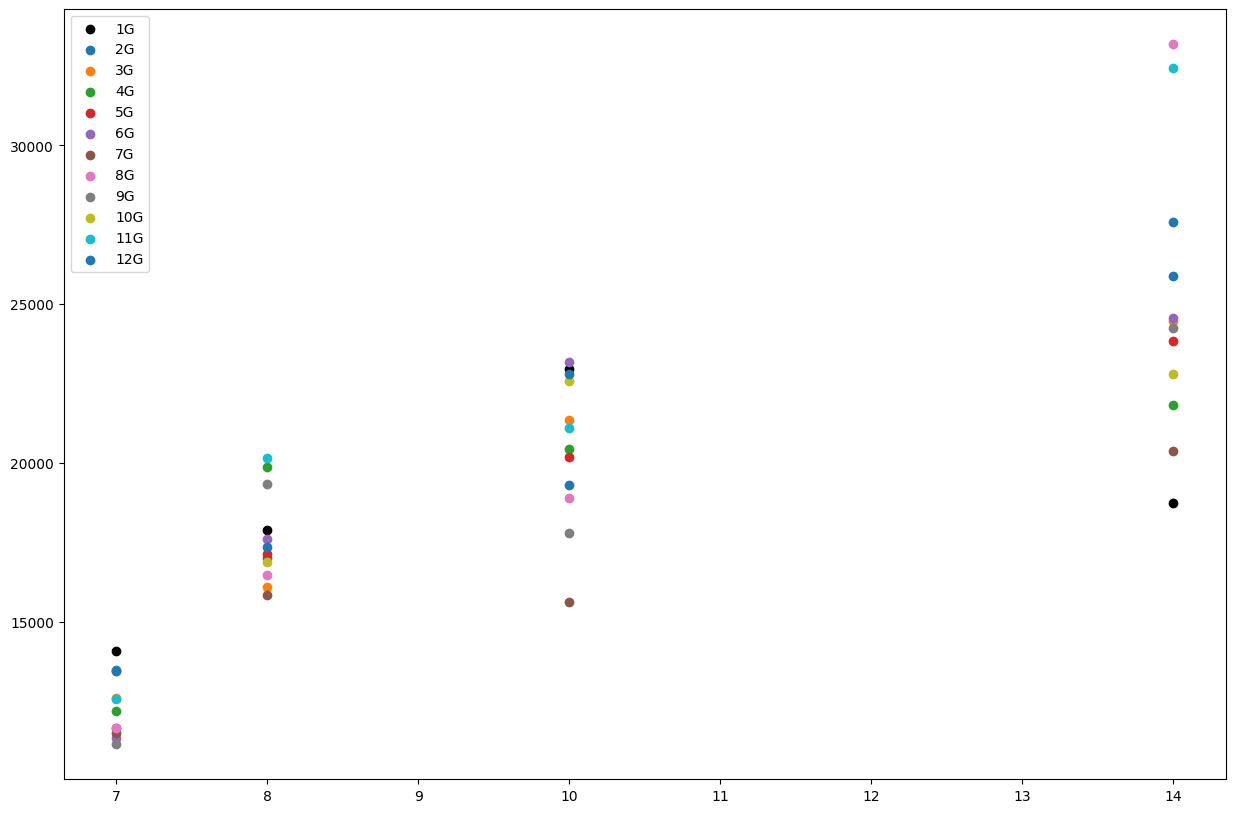

In [46]:
plt.figure(figsize=(15, 10))
plt.scatter(H,G0,label="1G",color='black')
plt.scatter(H,G1,label="2G")
plt.scatter(H,G2,label="3G")
plt.scatter(H,G3,label="4G")
plt.scatter(H,G4,label="5G")
plt.scatter(H,G5,label="6G")
plt.scatter(H,G6,label="7G")
plt.scatter(H,G7,label="8G")
plt.scatter(H,G8,label="9G")
plt.scatter(H,G9,label="10G")
plt.scatter(H,G10,label="11G")
plt.scatter(H,G11,label="12G")
plt.legend()

In [47]:
G2[2]

21369

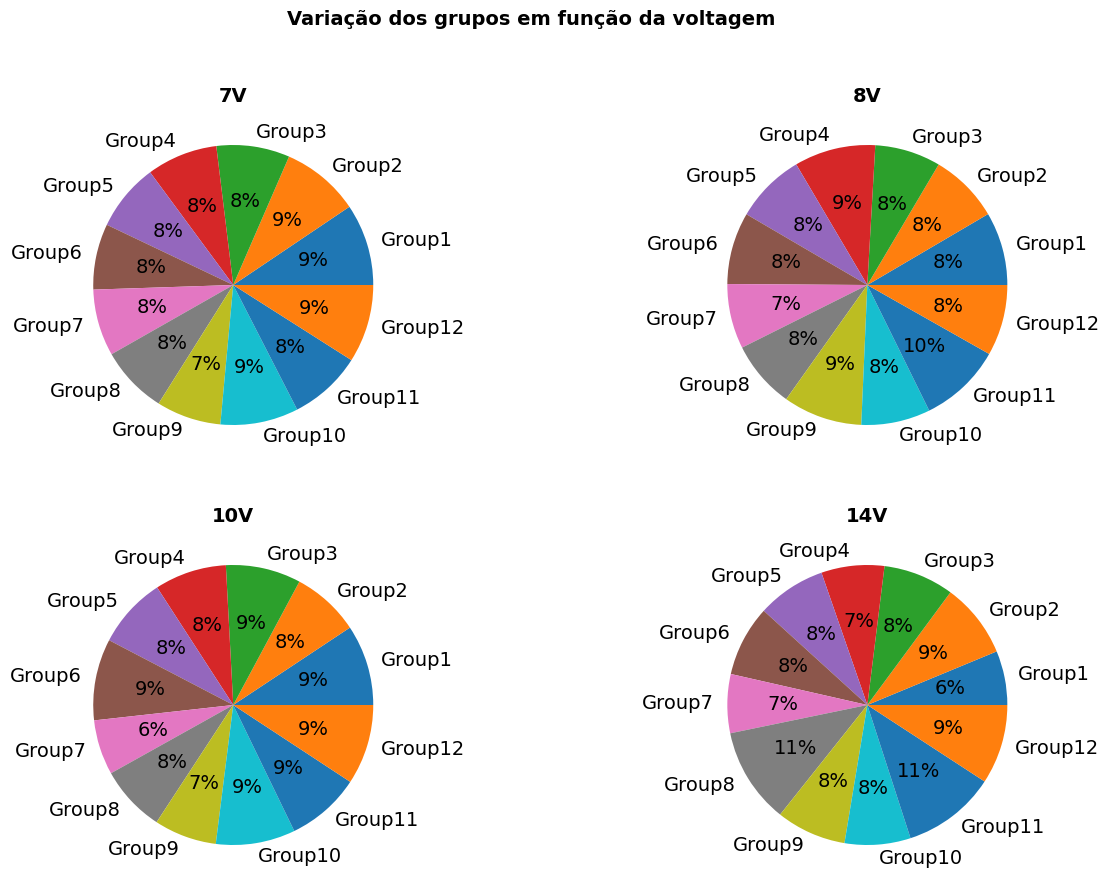

In [48]:
plt.figure(figsize=(15,10))
plt.suptitle('Variação dos grupos em função da voltagem', fontsize=14, weight='bold')

plt.subplot(2,2,1)
plt.title('7V', fontsize=14 , weight='bold')

plt.pie([G0[0],G1[0],G2[0],G3[0],G4[0],G5[0],G6[0],G7[0],G8[0],G9[0],G10[0],G11[0]],labels=['Group1','Group2','Group3','Group4','Group5','Group6','Group7','Group8','Group9','Group10','Group11','Group12'],
        textprops={'fontsize': 14},autopct='%.0f%%')
plt.subplot(2,2,2)
plt.title('8V', fontsize=14 , weight='bold')
plt.pie([G0[1],G1[1],G2[1],G3[1],G4[1],G5[1],G6[1],G7[1],G8[1],G9[1],G10[1],G11[1]],labels=['Group1','Group2','Group3','Group4','Group5','Group6','Group7','Group8','Group9','Group10','Group11','Group12'],
        textprops={'fontsize': 14},autopct='%.0f%%')
plt.subplot(2,2,3)
plt.title('10V', fontsize=14 , weight='bold')
plt.pie([G0[2],G1[2],G2[2],G3[2],G4[2],G5[2],G6[2],G7[2],G8[2],G9[2],G10[2],G11[2]],labels=['Group1','Group2','Group3','Group4','Group5','Group6','Group7','Group8','Group9','Group10','Group11','Group12'],
        textprops={'fontsize': 14},autopct='%.0f%%')

plt.subplot(2,2,4)
plt.title('14V', fontsize=14 , weight='bold')
plt.pie([G0[3],G1[3],G2[3],G3[3],G4[3],G5[3],G6[3],G7[3],G8[3],G9[3],G10[3],G11[3]],labels=['Group1','Group2','Group3','Group4','Group5','Group6','Group7','Group8','Group9','Group10','Group11','Group12'],
        textprops={'fontsize': 14},autopct='%.0f%%')
plt.show()

## 7V
<img src='7V.png'>

## 8V
<img src='8V.png'>

## 10V
<img src='10V.png'>

# Analisando os Grupos
<img src='14.png'>



<img src='Analise_grupos.png'>







### Grupo 2 $\approx$ 12 $\approx$ 9
### Grupo 5 $\approx$ 4 $\approx$ 3
### Grupo 1 $\approx$ 8 




In [49]:
G0 = np.array([result_7v[0][1],result_8v[10][1],result_10v[3][1],0])
G1 = np.array([result_7v[1][1],result_8v[5][1],result_10v[8][1],result_14v[10][1]+result_14v[11][1]])
G2 = np.array([result_7v[2][1],result_8v[0][1],result_10v[1][1],result_14v[2][1]])
G3 = np.array([result_7v[3][1],result_8v[1][1],result_10v[0][1],result_14v[2][1]+result_14v[3][1]+result_14v[7][1]])
G4 = np.array([result_7v[4][1],result_8v[9][1],result_10v[9][1],result_14v[0][1]+result_14v[8][1]])
G5 = np.array([result_7v[5][1],result_8v[2][1]+result_10v[6][1],result_10v[11][1],result_14v[5][1]])
G6 = np.array([result_7v[6][1],result_8v[8][1],result_10v[7][1],result_14v[9][1]])
G7 = np.array([result_7v[7][1],0,0,0])
G8 = np.array([result_7v[8][1],result_8v[4][1],0,0])
G9 = np.array([result_7v[9][1],result_8v[3][1],result_10v[6][1],result_14v[1][1]+result_14v[4][1]+result_14v[5][1]+result_14v[6][1]])
G10 = np.array([result_7v[10][1],0,0,0])
G11 = np.array([result_7v[11][1],result_8v[7][1],result_10v[10][1],0])

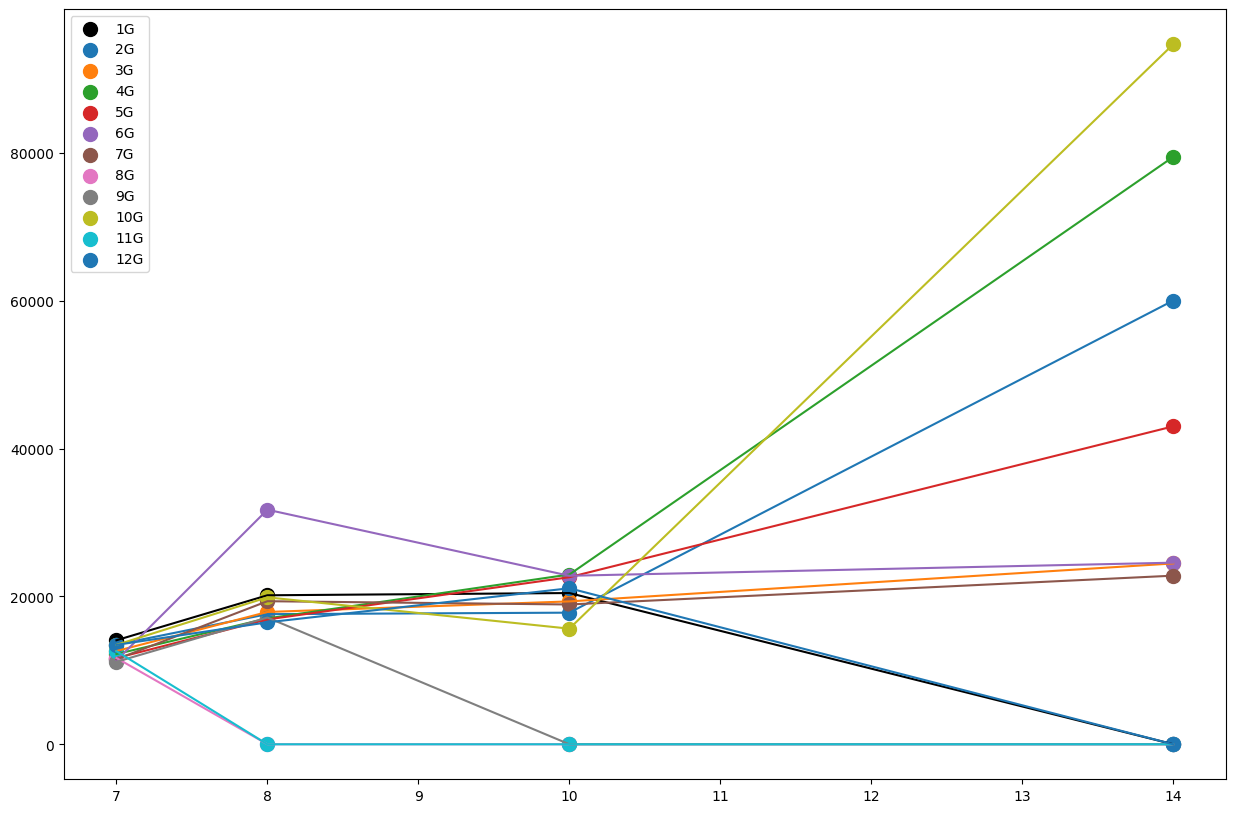

In [50]:
plt.figure(figsize=(15, 10))
plt.scatter(H,G0,label="1G",color='black',s=100)
plt.plot(H,G0,color='black') 
plt.scatter(H,G1,label="2G",s=100)
plt.plot(H,G1)
plt.scatter(H,G2,label="3G",s=100)
plt.plot(H,G2)
plt.scatter(H,G3,label="4G",s=100)
plt.plot(H,G3)
plt.scatter(H,G4,label="5G",s=100)
plt.plot(H,G4)
plt.scatter(H,G5,label="6G",s=100)
plt.plot(H,G5)
plt.scatter(H,G6,label="7G",s=100)
plt.plot(H,G6)
plt.scatter(H,G7,label="8G",s=100)
plt.plot(H,G7)
plt.scatter(H,G8,label="9G",s=100)
plt.plot(H,G8)
plt.scatter(H,G9,label="10G",s=100)
plt.plot(H,G9)
plt.scatter(H,G10,label="11G",s=100)
plt.plot(H,G10)
plt.scatter(H,G11,label="12G",s=100)
plt.plot(H,G11)
plt.legend()

### Grupo 2 $\approx$ 12 $\approx$ 9
### Grupo 5 $\approx$ 4 $\approx$ 3
### Grupo 1 $\approx$ 8 



In [51]:
Ga = np.array([result_7v[0][1]+result_7v[7][1],result_8v[10][1],result_10v[3][1],0])
Gb = np.array([result_7v[1][1]+result_7v[11][1]+result_7v[8][1],result_8v[5][1]+result_8v[7][1]+result_8v[4][1],result_10v[8][1]+result_10v[10][1],result_14v[10][1]+result_14v[11][1]])

Gc = np.array([result_7v[2][1]+result_7v[3][1]+result_7v[4][1],result_8v[0][1]+result_8v[1][1]+result_8v[9][1],result_10v[9][1]+result_10v[1][1]+result_10v[0][1],result_14v[2][1]+result_14v[2][1]+result_14v[3][1]+result_14v[7][1]+result_10v[9][1]])


#G3 = np.array([result_7v[3][1],result_8v[1][1],result_10v[0][1],result_14v[2][1]+result_14v[3][1]+result_14v[7][1]])
#G4 = np.array([result_7v[4][1],result_8v[9][1],result_10v[9][1],result_10v[9][1]])
Gd = np.array([result_7v[5][1],result_8v[2][1]+result_10v[6][1],result_10v[11][1],result_14v[5][1]])
Ge = np.array([result_7v[6][1],result_8v[8][1],result_10v[7][1],result_14v[9][1]])
#G7 = np.array([result_7v[7][1],0,0,0])
#G8 = np.array([result_7v[8][1],result_8v[4][1],0,0])
Gf = np.array([result_7v[9][1],result_8v[3][1],result_10v[6][1],result_14v[1][1]+result_14v[4][1]+result_14v[5][1]+result_14v[6][1]])
Gg = np.array([result_7v[10][1],0,0,0])
#G11 = np.array([result_7v[11][1],result_8v[7][1],result_10v[10][1],0])

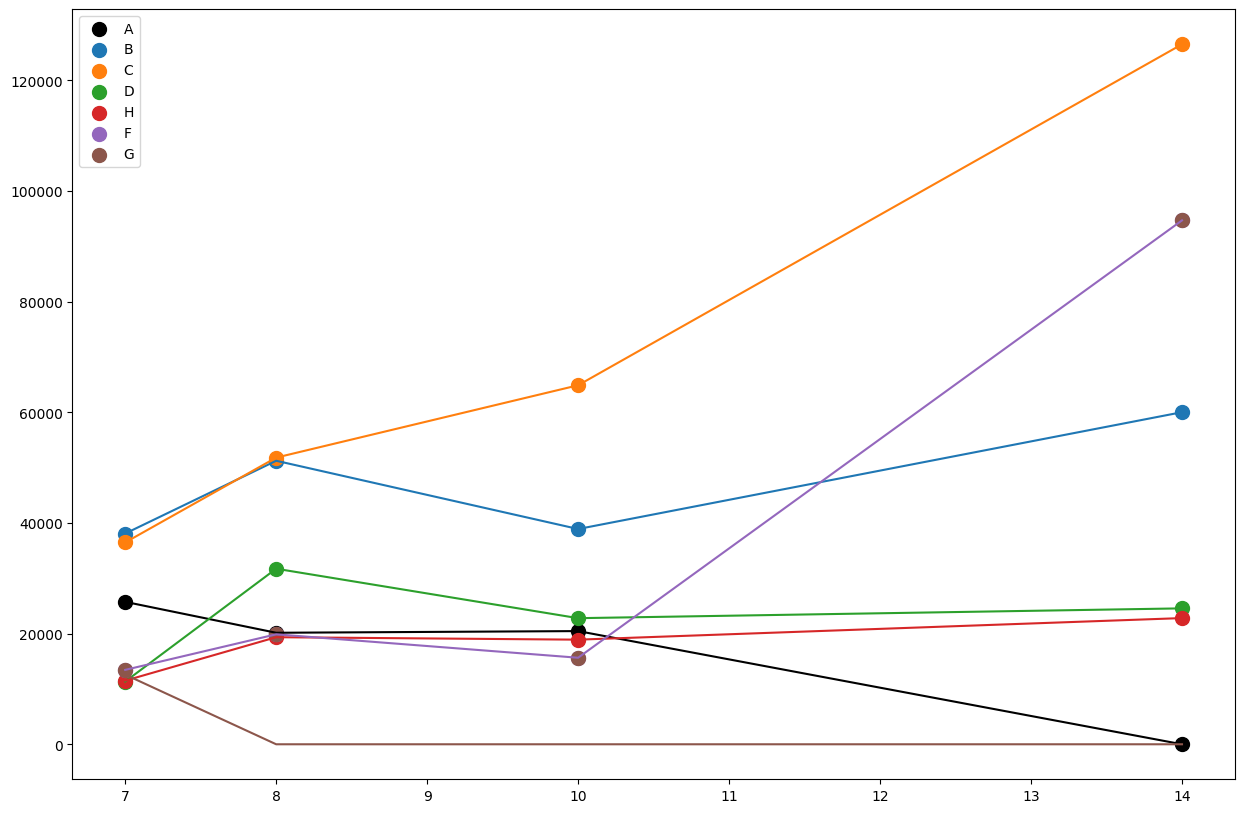

In [52]:
plt.figure(figsize=(15, 10))
plt.scatter(H,Ga,label="A",color='black',s=100)
plt.plot(H,Ga,color='black') 
plt.scatter(H,Gb,label="B",s=100)
plt.plot(H,Gb)
plt.scatter(H,Gc,label="C",s=100)
plt.plot(H,Gc)

plt.scatter(H,Gd,label="D",s=100)
plt.plot(H,Gd)
plt.scatter(H,Ge,label="H",s=100)
plt.plot(H,Ge)

plt.scatter(H,Gf,label="F",s=100)
plt.plot(H,Gf)
plt.scatter(H,Gf,label="G",s=100)
plt.plot(H,Gg)

plt.legend()

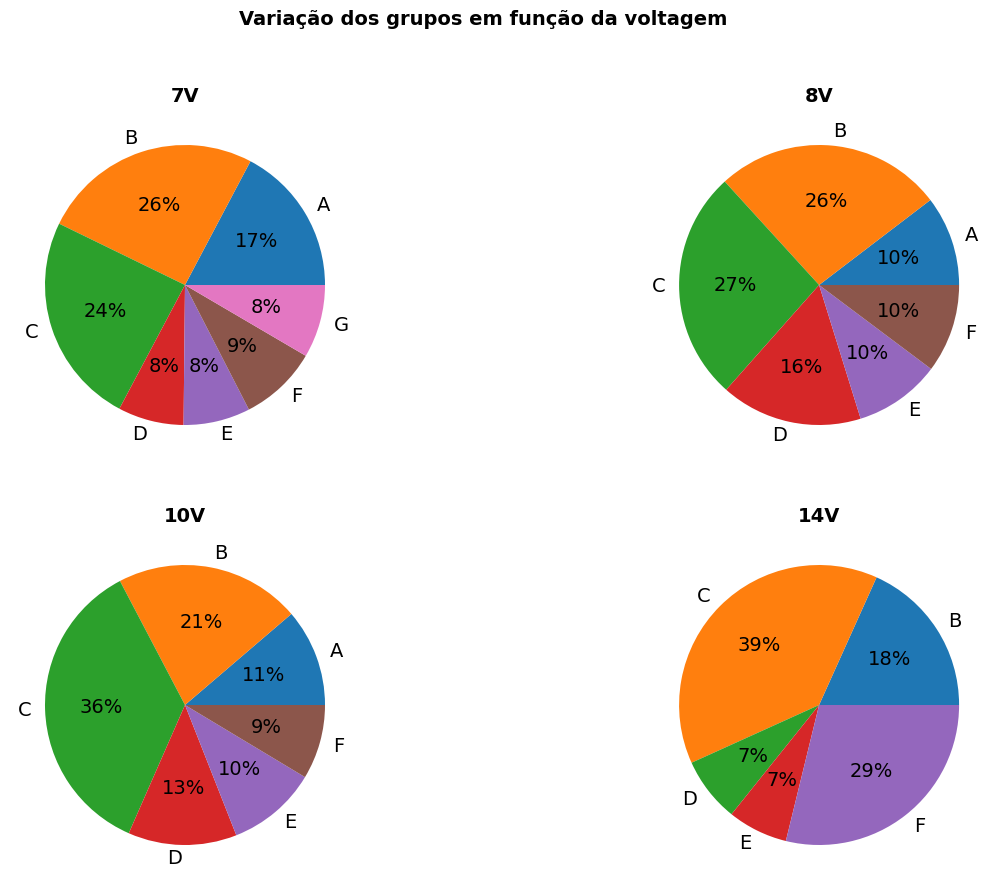

In [53]:
plt.figure(figsize=(15,10))
plt.suptitle('Variação dos grupos em função da voltagem', fontsize=14, weight='bold')

plt.subplot(2,2,1)
plt.title('7V', fontsize=14 , weight='bold')

plt.pie([Ga[0],Gb[0],Gc[0],Gd[0],Ge[0],Gf[0],Gg[0]],labels=['A','B','C','D','E','F','G'],
        textprops={'fontsize': 14},autopct='%.0f%%')
plt.subplot(2,2,2)
plt.title('8V', fontsize=14 , weight='bold')
plt.pie([Ga[1],Gb[1],Gc[1],Gd[1],Ge[1],Gf[1]],labels=['A','B','C','D','E','F'],textprops={'fontsize': 14},autopct='%.0f%%')
plt.subplot(2,2,3)
plt.title('10V', fontsize=14 , weight='bold')
plt.pie([Ga[2],Gb[2],Gc[2],Gd[2],Ge[2],Gf[2]],labels=['A','B','C','D','E','F'],
        textprops={'fontsize': 14},autopct='%.0f%%')

plt.subplot(2,2,4)
plt.title('14V', fontsize=14 , weight='bold')
plt.pie([Gb[3],Gc[3],Gd[3],Ge[3],Gf[3]],labels=['B','C','D','E','F'],
        textprops={'fontsize': 14},autopct='%.0f%%')
plt.show()

In [54]:
#!pip install opencv-python

# Clusterizando as imagens dos grupos

In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [56]:
#cont = 0
X = []
#X = np.zeros([46,12998])
for i in range(1,52):
    if(i == 4 or i ==25 or i==39): continue
    else:
         a = cv2.imread("/home/sidney/Documentos/helimak/teste_figuras/"+str(i)+".png",1)
         a = a[:97,:134]
         #print(a.shape)
         #a = a.reshape(1,-1)
        
        # print(a.shape)
         #print(cont)
         X.append(a)
        

In [57]:
X = np.array(X,dtype='float')
#X = X.reshape(-1,12998)
#X = X
X = X.reshape((X.shape[0], -1))/255.
#test_images = test_images.reshape((test_images.shape[0], -1))/255.

In [58]:
label  = np.arange(1, 48,1)

plt.figure()
plt.figure(figsize=(10,10))
 
for i in range(X.shape[0]+1):
    #plt.title(label[i])
    plt.subplot(9,6,i+1)
    print(i)
    plt.title(label[i])
    plt.imshow(X[i+1].reshape(97,-1))
plt.tight_layout()  
plt.show()

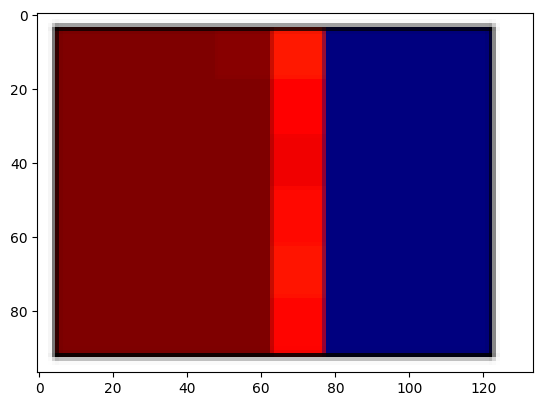

In [59]:
plt.imshow(X[46].reshape(97,-1,3))

In [60]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

In [61]:
X.shape

(48, 38994)

In [62]:
from umap import UMAP
from umap.parametric_umap import ParametricUMAP

In [63]:
dims = (97,134,3)
n_components = 2
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Conv2D(
        filters=128, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 67, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 34, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 108800)            0         
                                                                 
 dense_3 (Dense)             (None, 512)               55706112  
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 56,045,442
Trainable params: 56,045,442


In [66]:
embedder = ParametricUMAP(encoder=encoder, dims=dims, n_components=n_components, n_training_epochs=1, verbose=True)

In [67]:
embedding = embedder.fit_transform(X)

ParametricUMAP(dims=(97, 134, 3), encoder=<keras.engine.sequential.Sequential object at 0x7fa82c6dddf0>, optimizer=<keras.optimizers.optimizer_v2.adam.Adam object at 0x7fa88b239490>)
Thu Nov 30 10:21:04 2023 Construct fuzzy simplicial set
Thu Nov 30 10:21:05 2023 Finding Nearest Neighbors
Thu Nov 30 10:21:08 2023 Finished Nearest Neighbor Search
Thu Nov 30 10:21:08 2023 Construct embedding
Epoch 1/10


2023-11-30 10:21:11.615515: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8905


294/294 [==============================] - 138s 457ms/step - loss: 0.3196
Epoch 2/10
294/294 [==============================] - 136s 461ms/step - loss: 0.3136
Epoch 3/10
294/294 [==============================] - 136s 462ms/step - loss: 0.3133
Epoch 4/10
294/294 [==============================] - 136s 463ms/step - loss: 0.3151
Epoch 5/10
294/294 [==============================] - 137s 466ms/step - loss: 0.3168
Epoch 6/10
294/294 [==============================] - 137s 465ms/step - loss: 0.3135
Epoch 7/10
294/294 [==============================] - 138s 468ms/step - loss: 0.3145
Epoch 8/10
294/294 [==============================] - 138s 468ms/step - loss: 0.3137
Epoch 9/10
294/294 [==============================] - 138s 468ms/step - loss: 0.3123
Epoch 10/10
2/2 [==============================] - 0s 135ms/step
Thu Nov 30 10:44:00 2023 Finished embedding


Text(0.5, 0, 'Epoch')

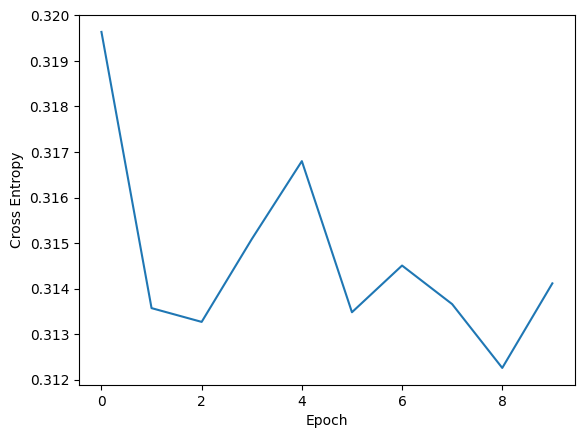

In [68]:
embedder._history.keys()
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

In [69]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances

In [70]:
kmeans_kwargs = {'init':'random', 'n_init':10, 'max_iter':2000, \
                    'random_state': 42 }

In [71]:
 kmeans = KMeans( n_clusters=4, **kmeans_kwargs )
kmeans.fit( embedding )

KMeans(init='random', max_iter=2000, n_clusters=4, n_init=10, random_state=42)

In [72]:
centroides = kmeans.cluster_centers_

In [73]:
LABELs = kmeans.labels_
LABELs

array([3, 0, 2, 2, 2, 3, 1, 3, 0, 1, 2, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 2,
       3, 2, 2, 2, 2, 3, 3, 0, 1, 1, 0, 2, 0, 3, 2, 3, 2, 2, 3, 3, 1, 2,
       2, 0, 0, 0], dtype=int32)

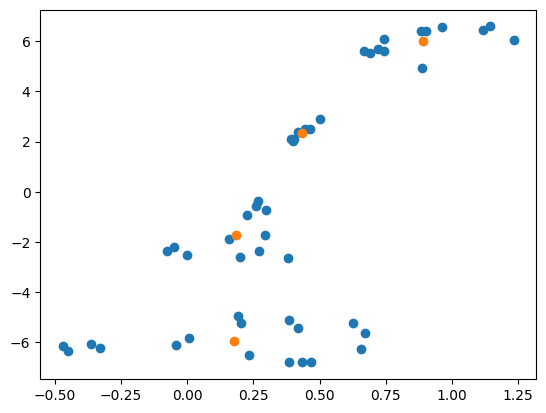

In [74]:
plt.scatter(embedding[:,0],embedding[:,1])
plt.scatter(centroides[:,0],centroides[:,1])

In [75]:
LABELs = LABELs.reshape(-1,1)
x = np.hstack([embedding,LABELs])

# Grupo 1 = vermelho,
# Grupo 2 =Laranja,
# Grupo 3 = Azul, 
# Grupo 4 = Preto

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


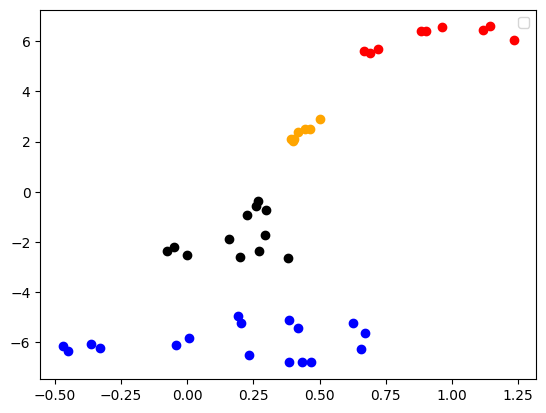

In [76]:
cmap = np.array(["red","orange","blue","black"])#,"pink","yellow"])

for i in range(45):
    k = int(x[i][2])
    plt.scatter(x[i][0],x[i][1],color = cmap[k])
   # plt.scatter(centroides[:,0],centroides[:,1],s=100)
plt.legend()

In [77]:
LABELs = LABELs.reshape(-1)
LABELs.shape

(48,)

# Abrir novamente as imagens, mas agora coloridas

In [78]:
#cont = 0
X = []
#X = np.zeros([46,12998])
for i in range(1,52):
    if(i == 4 or i ==25 or i==39): continue
    else:
         a = cv2.imread("/home/sidney/Documentos/helimak/teste_figuras/"+str(i)+".png",1)
         print(a.shape)
         a = a[:97,:134,:]
         #print(a.shape)
         a = a.reshape(1,-1)
        
        # print(a.shape)
         #print(cont)
         X.append(a)
        

(103, 134, 3)
(107, 134, 3)
(104, 134, 3)
(107, 138, 3)
(104, 134, 3)
(100, 134, 3)
(102, 134, 3)
(104, 134, 3)
(104, 134, 3)
(104, 134, 3)
(112, 134, 3)
(100, 134, 3)
(113, 134, 3)
(103, 134, 3)
(107, 134, 3)
(112, 135, 3)
(107, 134, 3)
(102, 134, 3)
(97, 134, 3)
(101, 134, 3)
(105, 134, 3)
(100, 134, 3)
(110, 134, 3)
(104, 134, 3)
(99, 134, 3)
(102, 134, 3)
(108, 134, 3)
(105, 134, 3)
(103, 134, 3)
(111, 134, 3)
(105, 134, 3)
(103, 134, 3)
(106, 134, 3)
(101, 134, 3)
(105, 134, 3)
(104, 134, 3)
(110, 134, 3)
(104, 135, 3)
(112, 134, 3)
(105, 134, 3)
(117, 134, 3)
(105, 134, 3)
(105, 134, 3)
(106, 134, 3)
(105, 134, 3)
(108, 134, 3)
(106, 134, 3)
(101, 134, 3)


In [79]:
np.shape(X)

(48, 1, 38994)

In [80]:
cont = 0
G1 = []
for k in range(48):
    if(LABELs[k] == 0):
        print("grupo 1 = ", k)
        G1.append(k)
print(" ")
G2 = []
for k in range(48):
    if(LABELs[k] == 1):
         print("grupo 2 = ", k)
         G2.append(k)
print(" ")
G3 = []
for k in range(48):
    if(LABELs[k] == 2):
         print("grupo 3 = ", k)
         G3.append(k)
print(" ")
G4 = []
for k in range(48):
    if(LABELs[k] == 3):
         print("grupo 4 = ", k)
         G4.append(k)
print(" ")
G5 = []
for k in range(48):
    if(LABELs[k] == 4):
         print("grupo 5 = ", k)
         G4.append(k)

grupo 1 =  1
grupo 1 =  8
grupo 1 =  11
grupo 1 =  16
grupo 1 =  17
grupo 1 =  19
grupo 1 =  29
grupo 1 =  32
grupo 1 =  34
grupo 1 =  45
grupo 1 =  46
grupo 1 =  47
 
grupo 2 =  6
grupo 2 =  9
grupo 2 =  15
grupo 2 =  20
grupo 2 =  30
grupo 2 =  31
grupo 2 =  42
 
grupo 3 =  2
grupo 3 =  3
grupo 3 =  4
grupo 3 =  10
grupo 3 =  12
grupo 3 =  13
grupo 3 =  21
grupo 3 =  23
grupo 3 =  24
grupo 3 =  25
grupo 3 =  26
grupo 3 =  33
grupo 3 =  36
grupo 3 =  38
grupo 3 =  39
grupo 3 =  43
grupo 3 =  44
 
grupo 4 =  0
grupo 4 =  5
grupo 4 =  7
grupo 4 =  14
grupo 4 =  18
grupo 4 =  22
grupo 4 =  27
grupo 4 =  28
grupo 4 =  35
grupo 4 =  37
grupo 4 =  40
grupo 4 =  41
 


In [81]:
len(G4)

12


for j in G1:
    plt.figure(figsize=(20,20))
    plt.subplot(9,9,j+1)
    plt.imshow(X[j].reshape(97,-1,3))
   plt.show()

In [121]:
print("   7V")
G1_7v = 0
for i in G1:
    if( i <= 13):
        print(i)
        G1_7v = G1_7v+1
print(" ")
G2_7v = 0
for i in G2:
    if( i <= 13):
        print(i)
        G2_7v = G2_7v+1
print(" ")
G3_7v = 0
for i in G3:
    if( i <= 13):
        print(i)
        G3_7v = G3_7v+1
G4_7v = 0
print(" ")
for i in G4:
    if( i <= 13):
        print(i)
        G4_7v = G4_7v+1

print("   8V")
G1_8v = 0
print(" ")
for i in G1:
    if( i > 13 and i<= 26):
        print(i)
        G1_8v = G1_8v+1
G2_8v = 0
print(" ")
for i in G2:
    if( i > 13 and i<= 26):
        print(i)
        G2_8v = G2_8v+1
G3_8v = 0
print(" ")
for i in G3:
    if( i > 13 and i<= 26):
        print(i)
        G3_8v = G3_8v+1
G4_8v = 0
print(" ")
for i in G4:
    if( i > 13 and i<= 26):
        G4_8v = G4_8v+1
print("   10V")
G1_10v = 0
print(" ")
for i in G1:
    if( i > 26 and i<= 38):
        G1_10v = G1_10v+1
G2_10v = 0
print(" ")
for i in G2:
    if( i > 26 and i<= 38):
        print(i)
        G2_10v = G2_10v+1
G3_10v = 0
for i in G3:
    if( i > 26 and i<= 38):
        G3_10v = G3_10v+1
G4_10v = 0
print(" ")
for i in G4:
    if( i > 26 and i<= 38):
        print(i)
        G4_10v = G4_10v+1
print("   14V")
G1_14v = 0
print(" ")
for i in G1:
    if( i > 38 ):
        print(i)
        G1_14v = G1_14v+1
G2_14v = 0
print(" ")
for i in G2:
    if( i > 38 ):
        print(i)
        G2_14v = G2_14v+1
G3_14v = 0
print(" ")
for i in G3:
    if( i > 38 ):
        print(i)
        G3_14v = G3_14v+1
G4_14v = 0
print(" ")
for i in G4:
    if( i > 38 ):
        print(i)
        G4_14v = G4_14v+1

   7V
1
8
11
 
6
9
 
2
3
4
10
12
13
 
0
5
7
   8V
 
16
17
19
 
15
20
 
21
23
24
25
26
 
   10V
 
 
30
31
 
27
28
35
37
   14V
 
45
46
47
 
42
 
39
43
44
 
40
41


In [113]:
V_7=  np.array([G1_7v,G2_7v,G3_7v,G4_7v])
print(V_7)
V_8=  np.array([G1_8v,G2_8v,G3_8v,G4_8v])
print(V_8)
V_10=  np.array([G1_10v,G2_10v,G3_10v,G4_10v])
print(V_10)
V_14=  np.array([G1_14v,G2_14v,G3_14v,G4_14v])
print(V_14)


[3 2 6 3]
[3 2 5 3]
[3 2 3 4]
[3 1 3 2]


In [166]:
V_7

array([3, 2, 6, 3])

In [110]:
Grupo = ["G1","G2","G3","G4"]

In [161]:
Grupo_1 = [V_7[0],V_8[0],V_10[0],V_14[0]]
Grupo_2 = [V_7[1],V_8[1],V_10[1],V_14[1]]
Grupo_3 = [V_7[2],V_8[2],V_10[2],V_14[2]]
Grupo_4 = [V_7[3],V_8[3],V_10[3],V_14[3]]
barWidth = 0.2

r1 = np.arange(len(Grupo_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#print(r1)
#print(r2)
#print(r3)
#print(r4)

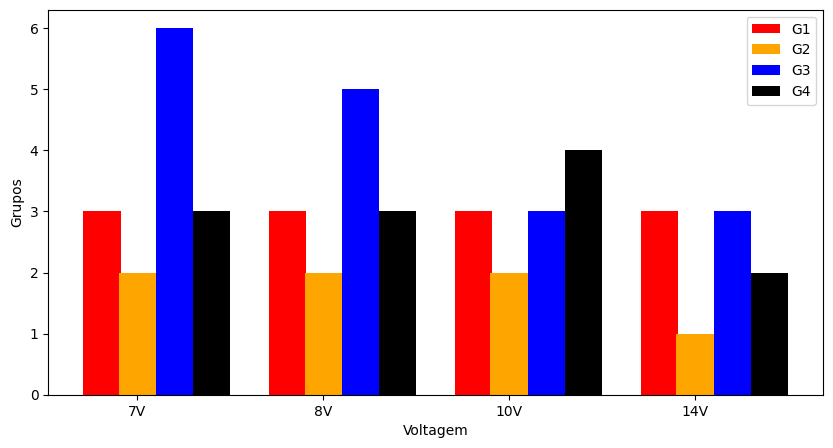

In [162]:
plt.figure(figsize=(10,5))
plt.bar(r1 +0.01, Grupo_1, color="red", width = barWidth, label='G1')
plt.bar(r2, Grupo_2, color="orange", width = barWidth, label='G2')
plt.bar(r3, Grupo_3, color="blue", width = barWidth, label='G3')
plt.bar(r4, Grupo_4, color="black", width = barWidth, label='G4')
plt.xlabel("Voltagem")
plt.xticks([r + barWidth for r in range(len(Grupo_1))],["7V", "8V","10V","14V"])
plt.ylabel("Grupos")
plt.legend()
plt.show()

# Grupo 1

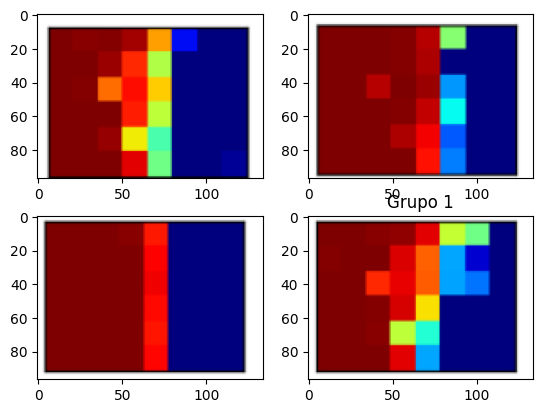

In [177]:
fig, ax = plt.subplots(nrows=2, ncols=2)
plt.title("Grupo 1")
ax[0,0].imshow(X[1].reshape(97,-1,3))
ax[0,1].imshow(X[19].reshape(97,-1,3))
ax[1,0].imshow(X[46].reshape(97,-1,3))
ax[1,1].imshow(X[8].reshape(97,-1,3))
plt.show()


# Grupo 2

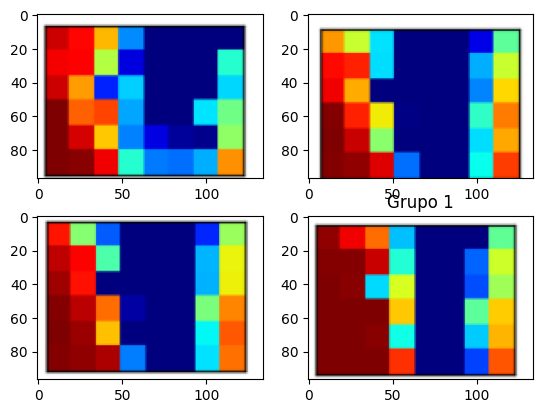

In [179]:
fig, ax = plt.subplots(nrows=2, ncols=2)
plt.title("Grupo 2")
ax[0,0].imshow(X[6].reshape(97,-1,3))
ax[0,1].imshow(X[15].reshape(97,-1,3))
ax[1,0].imshow(X[30].reshape(97,-1,3))
ax[1,1].imshow(X[42].reshape(97,-1,3))
plt.show()

# Grupo 3

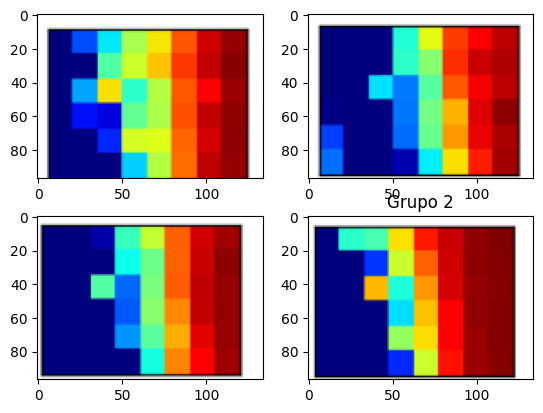

In [181]:
fig, ax = plt.subplots(nrows=2, ncols=2)
plt.title("Grupo 2")
ax[0,0].imshow(X[2].reshape(97,-1,3))
ax[0,1].imshow(X[13].reshape(97,-1,3))
ax[1,0].imshow(X[26].reshape(97,-1,3))
ax[1,1].imshow(X[44].reshape(97,-1,3))
plt.show()

# Grupo 4

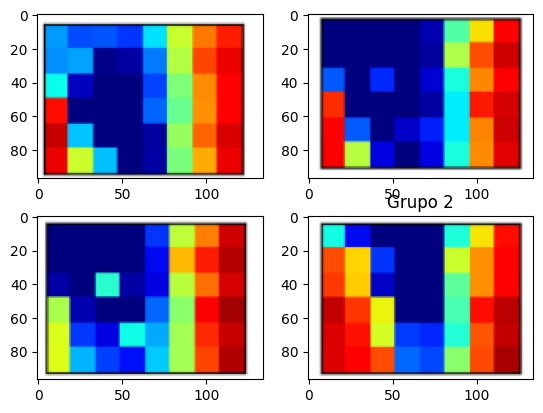

In [183]:
fig, ax = plt.subplots(nrows=2, ncols=2)
plt.title("Grupo 2")
ax[0,0].imshow(X[0].reshape(97,-1,3))
ax[0,1].imshow(X[18].reshape(97,-1,3))
ax[1,0].imshow(X[35].reshape(97,-1,3))
ax[1,1].imshow(X[41].reshape(97,-1,3))
plt.show()

In [11]:
class Reservoir(object):
    """
    Build a reservoir and evaluate internal states
    
    Parameters:
        n_internal_units = processing units in the reservoir
        spectral_radius = largest eigenvalue of the reservoir matrix of connection weights
        leak = amount of leakage in the reservoir state update (optional)
        connectivity = percentage of nonzero connection weights (unused in circle reservoir)
        input_scaling = scaling of the input connection weights
        noise_level = deviation of the Gaussian noise injected in the state update
        circle = generate determinisitc reservoir with circle topology
    """
    
    def __init__(self, n_internal_units=100, spectral_radius=0.99, leak=None,
                 connectivity=0.3, input_scaling=0.2, noise_level=0.01, circle=False):
        
        # Initialize attributes
        self._n_internal_units = n_internal_units
        self._input_scaling = input_scaling
        self._noise_level = noise_level
        self._leak = leak

        # Input weights depend on input size: they are set when data is provided
        self._input_weights = None

        # Generate internal weights
        if circle:
            self._internal_weights = self._initialize_internal_weights_Circ(
                    n_internal_units,
                    spectral_radius)
        else:
            self._internal_weights = self._initialize_internal_weights(
                n_internal_units,
                connectivity,
                spectral_radius)


    def _initialize_internal_weights_Circ(self, n_internal_units, spectral_radius):
        
        internal_weights = np.zeros((n_internal_units, n_internal_units))
        internal_weights[0,-1] = spectral_radius
        for i in range(n_internal_units-1):
            internal_weights[i+1,i] = spectral_radius
                
        return internal_weights
    
    
    def _initialize_internal_weights(self, n_internal_units,
                                     connectivity, spectral_radius):

        # Generate sparse, uniformly distributed weights.
        internal_weights = sparse.rand(n_internal_units,
                                       n_internal_units,
                                       density=connectivity).todense() #cria uma matriz esparca

        # Ensure that the nonzero values are uniformly distributed in [-0.5, 0.5]
        internal_weights[np.where(internal_weights > 0)] -= 0.5
        
        # Adjust the spectral radius.
        E, _ = np.linalg.eig(internal_weights) #calcula o autovalor
        e_max = np.max(np.abs(E)) #calcula o autovalor maximo
        internal_weights /= np.abs(e_max)/spectral_radius       

        return internal_weights


    def _compute_state_matrix(self, X, n_drop=0): #n_drop => transiente
        N, T, _ = X.shape
        previous_state = np.zeros((N, self._n_internal_units), dtype=float)

        # Storage
        state_matrix = np.empty((N, T - n_drop, self._n_internal_units), dtype=float)
        for t in range(T):
            current_input = X[:, t, :]

            # Calculate state
            state_before_tanh = self._internal_weights.dot(previous_state.T) + self._input_weights.dot(current_input.T)

            # Add noise
            state_before_tanh += np.random.rand(self._n_internal_units, N)*self._noise_level

            # Apply nonlinearity and leakage (optional)
            if self._leak is None:
                previous_state = np.tanh(state_before_tanh).T
            else:
                previous_state = (1.0 - self._leak)*previous_state + np.tanh(state_before_tanh).T

            # Armazene tudo após o período de abandono
            if (t > n_drop - 1):
                state_matrix[:, t - n_drop, :] = previous_state

        return state_matrix


    def get_states(self, X, n_drop=0, bidir=True):
        N, T, V = X.shape
        if self._input_weights is None: #calcula os pesos de entrada
            self._input_weights = (2.0*np.random.binomial(1, 0.5 , [self._n_internal_units, V]) - 1.0)*self._input_scaling

        # compute sequence of reservoir states
        states = self._compute_state_matrix(X, n_drop)
    
        # estados do reservatório na entrada invertida no tempo
        if bidir is True:
            X_r = X[:, ::-1, :]
            states_r = self._compute_state_matrix(X_r, n_drop)
            states = np.concatenate((states, states_r), axis=2)

        return states
    
    def getReservoirEmbedding(self, X,pca, ridge_embedding,  n_drop=5, bidir=True, test = False):

        res_states = self.get_states(X, n_drop=5, bidir=True)


        N_samples = res_states.shape[0]
        res_states = res_states.reshape(-1, res_states.shape[2])                   
        # ..transform..
        if test:
            red_states = pca.transform(res_states)
        else:
            red_states = pca.fit_transform(res_states)          
        # ..and put back in tensor form
        red_states = red_states.reshape(N_samples,-1,red_states.shape[1])  

        coeff_tr = []
        biases_tr = []   

        for i in range(X.shape[0]):
            ridge_embedding.fit(red_states[i, 0:-1, :], red_states[i, 1:, :])
            coeff_tr.append(ridge_embedding.coef_.ravel())
            biases_tr.append(ridge_embedding.intercept_.ravel())
        print(np.array(coeff_tr).shape,np.array(biases_tr).shape)
        input_repr = np.concatenate((np.vstack(coeff_tr), np.vstack(biases_tr)), axis=1)
        return input_repr

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, f1_score
import scipy.io
from scipy import sparse
import scipy.io as spio

In [13]:
data.shape

(211741, 40)

In [14]:
pca = PCA(n_components=5)
ridge_embedding = Ridge(alpha=10, fit_intercept=True)
t = 5*5+5

In [ ]:
res = Reservoir(n_internal_units=400, spectral_radius=0.96, leak=0.95,
                 connectivity=0.25, input_scaling=0.9, noise_level=0.001, circle=False)
input_repr = np.zeros((data.shape[0],t))
cont = 0
for i in range(data.shape[0]):
    y = data[i,:]
    y = y.reshape(-1,40,1)
    estado = res.getReservoirEmbedding(y,pca, ridge_embedding,  n_drop=5, bidir=True, test = False)
    input_repr[i] = estado
    cont = cont+1
    print(cont)

(1, 25) (1, 5)
1
(1, 25) (1, 5)
2
(1, 25) (1, 5)
3
(1, 25) (1, 5)
4
(1, 25) (1, 5)
5
(1, 25) (1, 5)
6
(1, 25) (1, 5)
7
(1, 25) (1, 5)
8
(1, 25) (1, 5)
9
(1, 25) (1, 5)
10
(1, 25) (1, 5)
11
(1, 25) (1, 5)
12
(1, 25) (1, 5)
13
(1, 25) (1, 5)
14
(1, 25) (1, 5)
15
(1, 25) (1, 5)
16
(1, 25) (1, 5)
17
(1, 25) (1, 5)
18
(1, 25) (1, 5)
19
(1, 25) (1, 5)
20
(1, 25) (1, 5)
21
(1, 25) (1, 5)
22
(1, 25) (1, 5)
23
(1, 25) (1, 5)
24
(1, 25) (1, 5)
25
(1, 25) (1, 5)
26
(1, 25) (1, 5)
27
(1, 25) (1, 5)
28
(1, 25) (1, 5)
29
(1, 25) (1, 5)
30
(1, 25) (1, 5)
31
(1, 25) (1, 5)
32
(1, 25) (1, 5)
33
(1, 25) (1, 5)
34
(1, 25) (1, 5)
35
(1, 25) (1, 5)
36
(1, 25) (1, 5)
37
(1, 25) (1, 5)
38
(1, 25) (1, 5)
39
(1, 25) (1, 5)
40
(1, 25) (1, 5)
41
(1, 25) (1, 5)
42
(1, 25) (1, 5)
43
(1, 25) (1, 5)
44
(1, 25) (1, 5)
45
(1, 25) (1, 5)
46
(1, 25) (1, 5)
47
(1, 25) (1, 5)
48
(1, 25) (1, 5)
49
(1, 25) (1, 5)
50
(1, 25) (1, 5)
51
(1, 25) (1, 5)
52
(1, 25) (1, 5)
53
(1, 25) (1, 5)
54
(1, 25) (1, 5)
55
(1, 25) (1, 5)
56
(

In [ ]:
np.savetxt("input_repr_umap.dat",input_repr)